In [28]:
import habitat
from habitat import Env, logger,VectorEnv
from arguments import get_args
from habitat.config.default import get_config
from habitat import make_dataset
from habitat.config import read_write

In [ ]:
def make_env():
    from habitat.config.default import get_config
    from habitat import make_dataset
    from habitat.config import read_write
    from habitat.config.default_structured_configs import TopDownMapMeasurementConfig
    from habitat.config.default_structured_configs import FogOfWarConfig
    from habitat.gym import make_gym_from_config

    config_env = get_config("configs/" + "objectnav_hm3d_rgbd_semantic.yaml")
    with read_write(config_env):
        config_env.habitat.dataset.split = 'val'
        config_env.habitat.task.measurements.top_down_map = TopDownMapMeasurementConfig(
        # You can customize the map here
        map_padding=3,
        map_resolution=512,
        draw_goal_positions=True,
        draw_shortest_path=True, # This is a cool feature to visualize the path
        draw_view_points=True,
        draw_border=True,
        fog_of_war= FogOfWarConfig(draw=True,visibility_dist=5,fov=72)
        )
    dataset = make_dataset(config_env.habitat.dataset.type, config=config_env.habitat.dataset)

    return make_gym_from_config(config_env, dataset)


In [29]:
config_env = get_config("configs/" + "objectnav_hm3d_rgbd_semantic.yaml")
from habitat.config.default_structured_configs import TopDownMapMeasurementConfig
from habitat.config.default_structured_configs import FogOfWarConfig
H = 1280
with read_write(config_env):
    config_env.habitat.dataset.split = 'val'
    config_env.habitat.simulator.agents.main_agent.sim_sensors.depth_sensor.height = H
    config_env.habitat.simulator.agents.main_agent.sim_sensors.rgb_sensor.height = H
    config_env.habitat.simulator.agents.main_agent.sim_sensors.semantic_sensor.height = H
    config_env.habitat.task.measurements.top_down_map = TopDownMapMeasurementConfig(
    # You can customize the map here
    map_padding=3,
    map_resolution=512,
    draw_goal_positions=True,
    draw_shortest_path=True, # This is a cool feature to visualize the path
    draw_view_points=True,
    draw_border=True,
    fog_of_war= FogOfWarConfig(draw=True,visibility_dist=5,fov=72)
    )

dataset = make_dataset(config_env.habitat.dataset.type, config=config_env.habitat.dataset)


2025-11-04 23:53:19,932 Initializing dataset ObjectNav-v1


In [30]:
from habitat.gym import make_gym_from_config
import matplotlib.pyplot as plt
env = make_gym_from_config(config_env, dataset)

2025-11-04 23:53:21,363 initializing sim Sim-v0
2025-11-04 23:53:24,096 Initializing task ObjectNav-v1


Renderer: NVIDIA A100-SXM4-80GB/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 535.247.01
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


In [31]:
env.reset()

OrderedDict([('compass', array([-3.9035326e-09], dtype=float32)),
             ('depth',
              array([[[0.1863719 ],
                      [0.18637398],
                      [0.186375  ],
                      ...,
                      [0.18631187],
                      [0.18631293],
                      [0.18631394]],
              
                     [[0.18666427],
                      [0.18666531],
                      [0.18666738],
                      ...,
                      [0.18660405],
                      [0.18660405],
                      [0.1866051 ]],
              
                     [[0.18695652],
                      [0.1869586 ],
                      [0.18695964],
                      ...,
                      [0.18689612],
                      [0.18689717],
                      [0.1868982 ]],
              
                     ...,
              
                     [[0.11042329],
                      [0.11043347],
                     

Info dictionary keys: dict_keys(['distance_to_goal', 'success', 'spl', 'soft_spl', 'distance_to_goal_reward', 'top_down_map'])
Info dictionary keys: odict_keys(['compass', 'depth', 'gps', 'objectgoal', 'rgb', 'semantic'])
True
-0.01


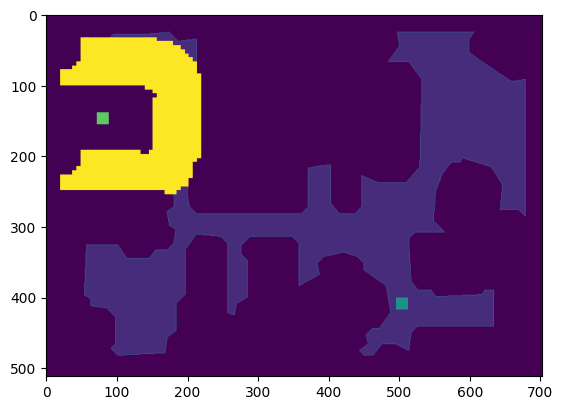

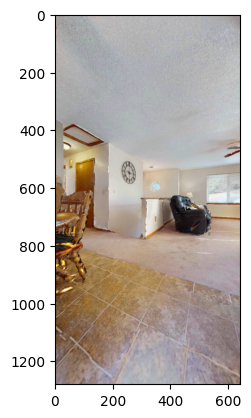

In [ ]:
obs,reward,terminated,info = env.step(0)
print("Info dictionary keys:", info.keys())
print("Info dictionary keys:", obs.keys())
print(terminated)
plt.imshow(info['top_down_map']['map'])
plt.figure()
plt.imshow(obs['rgb'])
print(reward)

In [34]:
def filter_fn(eps):
    # print(args.episode_id)
    # print(args.episode_id == '0')
    return eps.episode_id=='0' and eps.scene_id=='data/scene_datasets/hm3d/val/00877-4ok3usBNeis/4ok3usBNeis.basis.glb'

dataset = dataset.filter_episodes(filter_fn)

In [ ]:
dataset.episodes[0]

ObjectGoalNavEpisode(episode_id='0', scene_id='data/scene_datasets/hm3d/val/00877-4ok3usBNeis/4ok3usBNeis.basis.glb', scene_dataset_config='./data/scene_datasets/hm3d/hm3d_annotated_basis.scene_dataset_config.json', additional_obj_config_paths=[], start_position=[7.18678, 2.06447, 4.88622], start_rotation=[0, 0.23418, 0, 0.97219], info={'geodesic_distance': 5.98026, 'euclidean_distance': 7.86548, 'closest_goal_object_id': 419}, _shortest_path_cache=None, goals=[ObjectGoal(position=[9.03487, -0.16393, 1.0757], radius=None, object_id=201, object_name='bed_201', object_name_id=None, object_category='bed', room_id=None, room_name=None, view_points=[ObjectViewLocation(agent_state=AgentState(position=[9.25606, -0.53553, -0.42431], rotation=[0.0, 0.99732, 0.0, 0.07314]), iou=1.26406), ObjectViewLocation(agent_state=AgentState(position=[9.16606, -0.53553, -0.42431], rotation=[0.0, 0.99905, 0.0, 0.04361]), iou=1.26305), ObjectViewLocation(agent_state=AgentState(position=[9.34606, -0.53553, -0.4

In [ ]:
from gather_trajectories import HabitatSemanticMapper

480

In [ ]:
%env MAGNUM_LOG=quiet 
%env HABITAT_SIM_LOG=quiet


env: MAGNUM_LOG=quiet
env: HABITAT_SIM_LOG=quiet


In [ ]:
env = Env(config_env, dataset)


2025-09-14 01:48:47,296 initializing sim Sim-v0
2025-09-14 01:48:53,369 Initializing task ObjectNav-v1


In [ ]:
env.reset()

{'rgb': array([[[158, 150, 147],
         [154, 146, 144],
         [142, 133, 132],
         ...,
         [154, 146, 145],
         [158, 149, 150],
         [158, 149, 150]],
 
        [[163, 156, 153],
         [156, 148, 145],
         [140, 133, 131],
         ...,
         [155, 147, 146],
         [159, 150, 151],
         [159, 150, 151]],
 
        [[160, 153, 150],
         [156, 148, 145],
         [148, 139, 137],
         ...,
         [156, 148, 148],
         [159, 150, 151],
         [159, 150, 151]],
 
        ...,
 
        [[133, 125, 136],
         [132, 125, 134],
         [132, 124, 132],
         ...,
         [109,  87,  77],
         [106,  83,  74],
         [118,  93,  85]],
 
        [[131, 124, 136],
         [131, 124, 134],
         [133, 123, 132],
         ...,
         [125, 102,  95],
         [112,  89,  81],
         [115,  91,  84]],
 
        [[130, 123, 136],
         [131, 123, 135],
         [133, 122, 133],
         ...,
         [142, 118, 1

In [ ]:
current_episode = env.current_episode
shortest_path_length = current_episode.info.get('geodesic_distance')

In [ ]:
import habitat_sim
import numpy as np
print("--- Environment Initialized Successfully ---")

observations = env.reset()
print(f"Episode ID: {env.current_episode.episode_id}, Scene ID: {env.current_episode.scene_id}")

# --- 1. Get the Pre-calculated Shortest Path Length ---
precalculated_spl = env.current_episode.info.get('geodesic_distance')
print(f"\n[1] Pre-calculated Shortest Path (from episode.info): {precalculated_spl:.4f} meters")

# --- 2. Calculate Shortest Path On-the-fly (WITH SNAPPING) ---
path = habitat_sim.MultiGoalShortestPath()

# !! CRITICAL FIX: Snap points to the nearest navigable location first !!
path.requested_start = env.sim.pathfinder.snap_point(env.current_episode.start_position)

snapped_ends = [env.sim.pathfinder.snap_point(goal.position) for goal in env.current_episode.goals]
path.requested_ends = snapped_ends

# Check if snapping was successful (it returns the same point if it fails)
if np.allclose(path.requested_start, env.current_episode.start_position):
        print("\nNote: Start point snapping did not change the position significantly.")

env.sim.pathfinder.find_path(path)

on_the_fly_spl = path.geodesic_distance
print(f"[2] On-the-fly Shortest Path (after snapping): {on_the_fly_spl:.4f} meters")

# --- 3. Compare and Assert ---
print("\n--- Verification ---")
difference = np.abs(precalculated_spl - on_the_fly_spl)
print(f"Difference between [1] and [2]: {difference:.6f}")

# Use a small tolerance. The values might be slightly different
# if the original episode points were far from the navmesh.
tolerance = 0.1 # Using a more generous tolerance now
assert difference < tolerance, "The values are NOT consistent!"

print(f"\nSUCCESS: The pre-calculated and on-the-fly values are consistent within the tolerance of {tolerance}.")

--- Environment Initialized Successfully ---
Episode ID: 3, Scene ID: data/scene_datasets/hm3d/val/00877-4ok3usBNeis/4ok3usBNeis.basis.glb

[1] Pre-calculated Shortest Path (from episode.info): 3.5687 meters

Note: Start point snapping did not change the position significantly.
[2] On-the-fly Shortest Path (after snapping): 4.4324 meters

--- Verification ---
Difference between [1] and [2]: 0.863681


AssertionError: The values are NOT consistent!

In [ ]:
import os
import time
import habitat
from habitat import get_config
from habitat.config import read_write
from habitat import VectorEnv
from habitat.core.environments import GymHabitatEnv
import copy
from functools import partial

# This is a useful helper for creating varied configurations
from habitat.config.default import patch_config




def make_gym_env_fn(
    config: habitat,
    dataset: habitat.Dataset,
    worker_id: int,
    num_envs: int
) -> GymHabitatEnv: # <-- Note the return type hint
    """
    Creates a habitat.Env, filters the dataset, and then wraps the
    environment in HabitatGymEnv to make it compatible with VectorEnv.
    """
    # First, create the base Habitat environment with the sliced dataset
    dataset.episodes = dataset.episodes[worker_id::num_envs]
    # Now, wrap the base environment in the Gymnasium compatibility wrapper
    gym_env = GymHabitatEnv(config=config, dataset=dataset)
    
    return gym_env


# --- Step 5: Create `env_fn_args` (THE FIX) ---
# This must be a sequence of tuples. Each inner tuple contains the arguments
# for one call to `make_env_fn_correct`.

NUM_ENVIRONMENTS = 4

env_fn_args = tuple(
    (
        config_env,          # The config object
        dataset,    # The full dataset object (will be copied per process)
        i,               # The unique worker_id for this process
        NUM_ENVIRONMENTS # The total number of environments
    )
    for i in range(NUM_ENVIRONMENTS)
)

# Let's inspect the structure to be sure:
print(f"\nStructure of env_fn_args: {len(env_fn_args)} workers, each with {len(env_fn_args[0])} args.")
print(f"Args for worker 0: (config, dataset, worker_id={env_fn_args[0][2]}, ...)")
print(f"Args for worker 3: (config, dataset, worker_id={env_fn_args[3][2]}, ...)")


# --- Step 6: Create and Use the VectorEnv (THE FIX) ---
# We now use the single make_env_fn and the structured env_fn_args.
print(f"\nCreating VectorEnv with {NUM_ENVIRONMENTS} parallel environments...")

# If a vec_env already exists, close it.
try:
    vec_env.close()
except NameError:
    pass

vec_env = VectorEnv(
    make_env_fn=make_gym_env_fn, # The single "recipe" function
    env_fn_args=env_fn_args          # The list of per-worker arguments
)

# --- Verification ---
# Let's reset and check the starting episode ID for each environment
# They should all be different!
observations = vec_env.reset()
# episode_ids = vec_env.current_episodes.episode_id
# print(f"\nInitial episode IDs for each env: {episode_ids}")
# assert len(set(episode_ids)) == NUM_ENVIRONMENTS, "Error: Environments have overlapping episodes!"
# print("Success! Each environment started with a unique episode.")

# # You can now step as usual
# actions = vec_env.action_spaces.sample()
# vec_env.step(actions)

# # --- Clean up ---
# vec_env.close()
# print("\nVectorEnv closed.")


Structure of env_fn_args: 4 workers, each with 4 args.
Args for worker 0: (config, dataset, worker_id=0, ...)
Args for worker 3: (config, dataset, worker_id=3, ...)

Creating VectorEnv with 4 parallel environments...


PluginManager::Manager: duplicate static plugin StbImageImporter, ignoring
PluginManager::Manager: duplicate static plugin GltfImporter, ignoring
PluginManager::Manager: duplicate static plugin BasisImporter, ignoring
PluginManager::Manager: duplicate static plugin AssimpImporter, ignoring
PluginManager::Manager: duplicate static plugin AnySceneImporter, ignoring
PluginManager::Manager: duplicate static plugin AnyImageImporter, ignoring
2025-08-22 05:42:18,992 initializing sim Sim-v0
[05:42:19:008318]:[Warning]:[Metadata] AbstractAttributesManager.h(531)::buildAttrSrcPathsFromJSONAndLoad : <Stage Template> : No Glob path result found for `./data/scene_datasets/hm3d/example/00861-GLAQ4DNUx5U/*.basis.glb` so unable to load templates from that path.
[05:42:19:008368]:[Warning]:[Metadata] AbstractAttributesManager.h(531)::buildAttrSrcPathsFromJSONAndLoad : <Stage Template> : No Glob path result found for `./data/scene_datasets/hm3d/minival/00800-TEEsavR23oF/*.basis.glb` so unable to load t

Renderer: NVIDIA A100-SXM4-80GB/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 535.247.01
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


[05:42:19:725935]:[Warning]:[Metadata] SceneDatasetAttributes.cpp(107)::addNewSceneInstanceToDataset : Dataset : 'hm3d_annotated_basis' : Lighting Layout Attributes 'no_lights' specified in Scene Attributes but does not exist in dataset, so creating default.
PluginManager::Manager: duplicate static plugin StbImageImporter, ignoring
PluginManager::Manager: duplicate static plugin GltfImporter, ignoring
PluginManager::Manager: duplicate static plugin BasisImporter, ignoring
PluginManager::Manager: duplicate static plugin AssimpImporter, ignoring
PluginManager::Manager: duplicate static plugin AnySceneImporter, ignoring
PluginManager::Manager: duplicate static plugin AnyImageImporter, ignoring


KeyboardInterrupt: 

Process ForkServerProcess-1:
Traceback (most recent call last):
  File "/root/conda/envs/vln/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/root/conda/envs/vln/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/dependencies/habitat-lab/habitat-lab/habitat/core/vector_env.py", line 253, in _worker_env
    env = EnvCountEpisodeWrapper(EnvObsDictWrapper(env_fn(*env_fn_args)))
  File "/dependencies/habitat-lab/habitat-lab/habitat/utils/pickle5_multiprocessing.py", line 100, in __call__
    return self.fn(*args, **kwargs)
  File "/tmp/ipykernel_747734/2156384945.py", line 30, in make_gym_env_fn
  File "/dependencies/habitat-lab/habitat-lab/habitat/core/environments.py", line 126, in __init__
    base_env = RLTaskEnv(config=config, dataset=dataset)
  File "/dependencies/habitat-lab/habitat-lab/habitat/core/environments.py", line 46, in __init__
    super().__init__(config, dataset)
 

In [ ]:
import numpy as np
import quaternion
import matplotlib.pyplot as plt
def display_top_down_map(env: habitat.Env):
    """
    Displays the top-down map from the environment's current state
    by retrieving it from the task's measurements.
    """
    # Get the agent's current position for the plot title
    agent_state = env.sim.get_agent_state()
    agent_position = agent_state.position

    # Get the top-down map from the measurements.
    # This will work because we will add "top_down_map" to the config.
    metrics = env.get_metrics()
    if "top_down_map" not in metrics:
        print("Error: 'top_down_map' measurement not found in the environment's metrics.")
        print("Please make sure you have added it to your configuration.")
        return

    top_down_map = metrics["top_down_map"]

    # --- Matplotlib Display ---
    plt.figure(figsize=(8, 8))
    plt.imshow(top_down_map)
    plt.title(
        f"Agent Position: (x={agent_position[0]:.2f}, z={agent_position[2]:.2f})"
    )
    plt.axis('off')
    plt.show()

In [ ]:
def get_best_action(env, goal_position, turn_angle_rad):
    """
    A simple controller that turns the agent towards a goal position and
    then moves forward. This version uses the environment's configured turn
    angle to make decisions.

    :param env: The Habitat environment.
    :param goal_position: The [x, y, z] position of the next target.
    :param turn_angle_rad: The agent's turn angle in radians.
    :return: The name of the action to take ("MOVE_FORWARD", "TURN_LEFT", etc.)
    """
    # Get current agent state
    agent_state = env.sim.get_agent_state()
    current_pos = agent_state.position
    current_rot = agent_state.rotation

    # Calculate the angle to the goal in the XZ plane (yaw)
    direction_vector = goal_position - current_pos
    direction_vector[1] = 0
    if np.linalg.norm(direction_vector) < 1e-5:
        return "MOVE_FORWARD" # We are at the goal

    # Agent's forward direction is -Z in its local coordinate frame
    agent_forward_vector = quaternion.as_rotation_matrix(current_rot) @ np.array([0, 0, -1])
    
    # Get the signed angle between agent's forward and goal direction
    dot = np.dot(agent_forward_vector[[0, 2]], direction_vector[[0, 2]])
    det = agent_forward_vector[0] * direction_vector[2] - agent_forward_vector[2] * direction_vector[0]
    angle_to_goal = np.arctan2(det, dot)

    # --- Decide on the action (No Magic Numbers) ---
    # We define "facing the goal" as being within half of one turn action.
    # This is a robust heuristic that adapts to the environment's settings.
    angle_threshold = turn_angle_rad / 2.0

    if abs(angle_to_goal) < angle_threshold:
        return "MOVE_FORWARD"
    elif angle_to_goal > 0:
        return "TURN_LEFT"
    else:
        return "TURN_RIGHT"

In [ ]:
env.reset()




{'rgb': array([[[145, 138, 129],
         [145, 138, 129],
         [145, 138, 129],
         ...,
         [195, 187, 187],
         [192, 185, 184],
         [192, 185, 184]],
 
        [[145, 138, 129],
         [145, 138, 129],
         [145, 138, 129],
         ...,
         [192, 185, 184],
         [192, 185, 184],
         [192, 185, 184]],
 
        [[145, 138, 129],
         [145, 138, 129],
         [145, 138, 129],
         ...,
         [192, 185, 184],
         [192, 185, 184],
         [192, 185, 184]],
 
        ...,
 
        [[223, 160,  86],
         [223, 160,  86],
         [160, 132,  80],
         ...,
         [177, 165, 173],
         [177, 165, 173],
         [173, 161, 169]],
 
        [[223, 160,  86],
         [231, 173,  99],
         [160, 132,  80],
         ...,
         [167, 160, 164],
         [170, 163, 166],
         [170, 163, 166]],
 
        [[212, 149,  74],
         [231, 173,  99],
         [160, 132,  80],
         ...,
         [168, 161, 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
def detect_frontier_points(top_down_map,fog_of_war_mask,safety_margin=3):
    navigable_mask = (top_down_map > 0)
    
    # Erode the mask to create a safety margin. This is the crucial step
    # to eliminate points that are too close to walls.
    kernel = ndimage.morphology.generate_binary_structure(2, 1)
    safely_navigable_mask = ndimage.binary_erosion(
        navigable_mask, structure=kernel, iterations=safety_margin
    )

    # --- 2. Find a Clean Edge of the Fog of War ---
    explored_mask = fog_of_war_mask.astype(bool)
    
    # Slightly dilate the explored mask. This helps smooth the boundary and
    # pushes the "edge" calculation firmly into the unexplored territory,
    # preventing detections inside the already-visible area.
    dilated_explored = ndimage.binary_dilation(
        explored_mask, structure=kernel, iterations=1
    )
    edge_of_fog = dilated_explored & ~explored_mask

    # --- 3. Find the True, Safe Frontiers ---
    # The frontiers are the intersection of the fog's edge and the
    # "safely navigable" area.
    frontiers = edge_of_fog & safely_navigable_mask
    
    frontier_points = np.array(np.where(frontiers)).T
    return frontier_points
from sklearn.cluster import DBSCAN
def cluster_frontiers_to_waypoints(
    frontier_points: np.ndarray,
    eps: float = 10.0,
    min_samples: int = 5
) -> np.ndarray:
    """
    Clusters a dense set of frontier points into a small set of distinct
    waypoints, representing the center of each frontier region.

    :param frontier_points: An (N, 2) NumPy array of (row, col) frontier coordinates.
    :param eps: DBSCAN parameter: maximum distance between points in a neighborhood.
    :param min_samples: DBSCAN parameter: minimum number of points to form a cluster.
    :return: An (M, 2) NumPy array of waypoint coordinates (cluster centroids),
             or an empty array if no valid clusters are found.
    """
    if len(frontier_points) < min_samples:
        return np.array([], dtype=np.int32)

    # Use DBSCAN to find spatially separated groups of frontier points
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(frontier_points)
    cluster_labels = db.labels_
    
    # Get the unique cluster IDs, ignoring noise points (label -1)
    unique_labels = set(cluster_labels)
    if -1 in unique_labels:
        unique_labels.remove(-1)

    if not unique_labels:
        return np.array([], dtype=np.int32)

    # Calculate the centroid (mean) for each valid cluster
    waypoints = [
        np.mean(frontier_points[cluster_labels == label], axis=0)
        for label in unique_labels
    ]
        
    return np.array(waypoints, dtype=np.int32)
import cv2
def sample_line_frontiers(
    frontier_points: np.ndarray,
    map_shape: tuple,
    min_line_length: int = 20
) -> np.ndarray:
    """
    Samples waypoints from linear frontiers by finding the midpoint of each
    distinct frontier segment.

    :param frontier_points: An (N, 2) NumPy array of (row, col) frontier coordinates.
    :param map_shape: The (height, width) of the map.
    :param min_line_length: The minimum number of pixels for a segment to be
                            considered a valid frontier.
    :return: An (M, 2) NumPy array of waypoint coordinates (segment midpoints),
             or an empty array if no valid frontiers are found.
    """
    if len(frontier_points) < min_line_length:
        return np.array([], dtype=np.int32)

    # 1. Create a binary image of the frontiers
    frontier_map = np.zeros(map_shape, dtype=np.uint8)
    # Note: frontier_points are (row, col), which is correct for NumPy indexing
    frontier_map[frontier_points[:, 0], frontier_points[:, 1]] = 255
    
    # 2. Label contiguous frontier segments
    # The output `labels` is a map where each distinct line segment has a unique integer ID.
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        frontier_map, connectivity=8
    )

    waypoints = []
    # Loop from 1 to `num_labels` to skip the background (label 0)
    for i in range(1, num_labels):
        # 3. Filter out small, noisy segments
        segment_length = stats[i, cv2.CC_STAT_AREA]
        if segment_length < min_line_length:
            continue
            
        # 4. Find the point on the segment closest to its centroid
        
        # Get the coordinates of all pixels belonging to this segment
        segment_pixels = np.argwhere(labels == i)
        
        # Get the centroid of this segment
        centroid = centroids[i] # This is (x, y) which is (col, row)
        
        # Invert centroid to (row, col) for distance calculation with segment_pixels
        centroid_rc = np.array([centroid[1], centroid[0]])

        # Calculate the distance from every pixel in the segment to the centroid
        distances = np.linalg.norm(segment_pixels - centroid_rc, axis=1)
        
        # Find the index of the pixel with the minimum distance
        midpoint_index = np.argmin(distances)
        
        # The waypoint is the coordinate of that pixel
        waypoint = segment_pixels[midpoint_index]
        waypoints.append(waypoint)

    if not waypoints:
        return np.array([], dtype=np.int32)
        
    return np.array(waypoints, dtype=np.int32)
def sample_waypoints_from_line_segments(
    frontier_points: np.ndarray,
    map_shape: tuple,
    # Parameters for the Hough Line Transform
    hough_threshold: int = 20,
    min_line_length: int = 15,
    max_line_gap: int = 10
) -> np.ndarray:
    """
    Samples waypoints by detecting straight line segments in the frontier points
    using a Hough Line Transform and taking the midpoint of each segment.

    :param frontier_points: An (N, 2) array of (row, col) frontier coordinates.
    :param map_shape: The (height, width) of the map.
    :param hough_threshold: The minimum number of votes (points on the line)
                            to be considered a line.
    :param min_line_length: The minimum pixel length of a line.
    :param max_line_gap: The maximum allowed gap between points on the same line.
    :return: An (M, 2) NumPy array of waypoint coordinates (segment midpoints).
    """
    if len(frontier_points) < min_line_length:
        return np.array([], dtype=np.int32)

    # 1. Create a binary image of the frontiers for the line detector
    frontier_map = np.zeros(map_shape, dtype=np.uint8)
    frontier_map[frontier_points[:, 0], frontier_points[:, 1]] = 255
    
    # 2. Use the Probabilistic Hough Line Transform to detect line segments
    # This is the core of the correct line-based approach.
    lines = cv2.HoughLinesP(
        frontier_map,
        rho=1,                # 1-pixel distance resolution
        theta=np.pi / 180,    # 1-degree angle resolution
        threshold=hough_threshold,
        minLineLength=min_line_length,
        maxLineGap=max_line_gap,
    )

    # If no lines were detected, return an empty array
    if lines is None:
        return np.array([], dtype=np.int32)

    waypoints = []
    # The output 'lines' is an array of shape (N, 1, 4)
    for line in lines:
        # Each line is [[x1, y1, x2, y2]]
        x1, y1, x2, y2 = line[0]
        
        # 3. Calculate the midpoint of each detected line segment
        midpoint_x = (x1 + x2) // 2
        midpoint_y = (y1 + y2) // 2
        
        # Store the waypoint as (row, col)
        waypoints.append([midpoint_y, midpoint_x])
        
    if not waypoints:
        return np.array([], dtype=np.int32)
        
    return np.array(waypoints, dtype=np.int32)

def plot_frontiers(
    env,
    safety_margin: int = 3
):
    """
    Detects and plots frontiers with a safety margin to avoid false positives
    near walls or inside the explored area.

    :param top_down_map: 2D numpy array (grayscale map).
    :param fog_of_war_mask: 2D boolean numpy array where True is explored.
    :param safety_margin: Number of pixels to erode the navigable area by,
                          creating a margin from walls.
    """
    # --- 1. Identify "Safely Navigable" Space ---
    # Start with the basic navigable mask.
    """
    Detects and visualizes navigation frontiers, robustly handling both
    2D (grayscale) and 3D (RGB) top-down maps.

    :param top_down_map: A (H, W) or (H, W, C) numpy array.
    :param fog_of_war_mask: A (H, W) boolean numpy array where True means explored.
    """
    # --- 1. Create a Navigable Mask (Handles both 2D and 3D maps) ---
    top_down_map=env.get_metrics()["top_down_map"]["map"]
    fog_of_war_mask=env.get_metrics()['top_down_map']['fog_of_war_mask']

    frontier_points = detect_frontier_points(top_down_map,fog_of_war_mask)
    # waypoints = cluster_frontiers_to_waypoints(frontier_points)
    # waypoints = sample_line_frontiers(frontier_points,top_down_map.shape,min_line_length=8)
    waypoints = sample_waypoints_from_line_segments(frontier_points,top_down_map.shape,min_line_length=8)
    # --- 4. Plot for Verification ---
    plt.figure(figsize=(18, 6))

    # Plot original inputs for context
    plt.subplot(1, 3, 1)
    plt.title("Inputs")
    plt.imshow(top_down_map, cmap='gray')
    plt.imshow(fog_of_war_mask, alpha=0.5)
    plt.axis('off')
    
    # Plot the intermediate "safe" area to see the effect of erosion
    plt.subplot(1, 3, 2)
    plt.title(f"'Safe' Navigable Area (Margin={safety_margin}px)")
    # temp_vis = np.zeros_like(top_down_map, dtype=np.uint8)
    # temp_vis[safely_navigable_mask] = 255 # Show safe area in white
    # plt.imshow(top_down_map, cmap='gray')
    plt.axis('off')

    # Plot final results
    plt.subplot(1, 3, 3)
    plt.title(f"Result: {len(frontier_points)} Frontier Points Found")
    plt.imshow(top_down_map, cmap='gray')
    plt.imshow(fog_of_war_mask, alpha=0.3)
    
    if len(frontier_points) > 0:
        plt.scatter(frontier_points[:, 1], frontier_points[:, 0], c='cyan', s=10)
    plt.scatter(waypoints[:,1],waypoints[:,0],c='r')
    plt.axis('off')
        
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1142619/3356127843.py:13: DeprecationWarning: Please use `generate_binary_structure` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  kernel = ndimage.morphology.generate_binary_structure(2, 1)


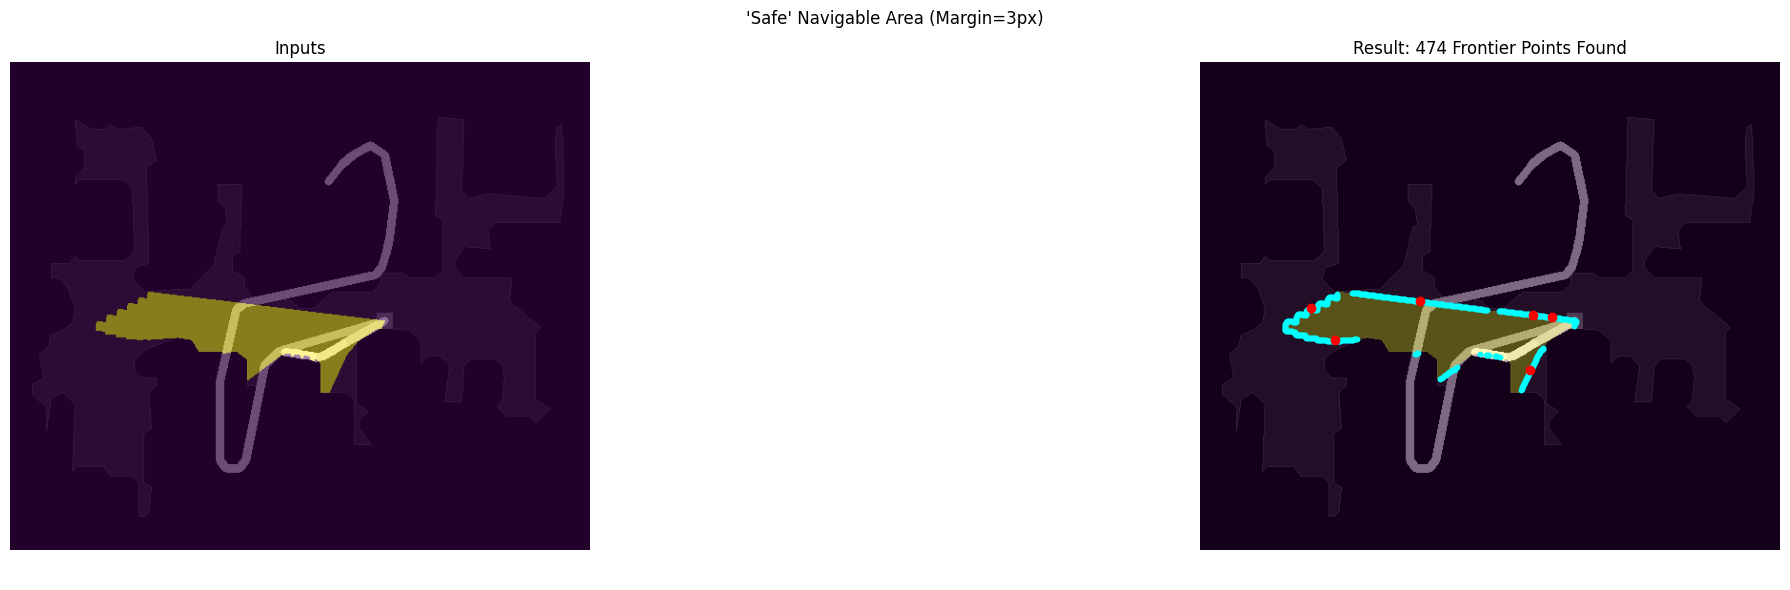

In [ ]:
env.step(1)
plot_frontiers(env)
# plt.imshow(env.get_metrics()["top_down_map"]["map"])

In [ ]:
import magnum as mn
from habitat.utils.visualizations import maps
def reproject_waypoints_to_3d(
    env: habitat.Env,
    waypoints_2d: np.ndarray
) -> np.ndarray:
    """
    Converts a list of 2D pixel waypoints on a top-down map into a list of
    valid, navigable 3D world coordinates.

    :param env: The active Habitat environment.
    :param waypoints_2d: An (N, 2) NumPy array of (row, col) waypoint coordinates.
    :return: An (N, 3) NumPy array of (X, Y, Z) world coordinates, snapped to
             the navigation mesh.
    """
    if len(waypoints_2d) == 0:
        return np.array([])

    # Get the necessary parameters for the `from_grid` helper function
    map_shape_hw = env.get_metrics()["top_down_map"]["map"].shape[:2]
    pathfinder = env.sim.pathfinder
    
    # Use the agent's current height as a reasonable guess for the Y-coordinate
    agent_y = env.sim.get_agent_state().position[1]
    
    waypoints_3d = []
    for waypoint_rc in waypoints_2d:
        row, col = waypoint_rc
        
        # Step 1: Convert from pixel (row, col) to world (X, Z)
        # Note: from_grid expects (x, y) which is (col, row)
        world_x, world_z = maps.from_grid(
            grid_x=row,
            grid_y=col,
            grid_resolution=map_shape_hw,
            pathfinder = env.sim.pathfinder
        )
        #z is right, so it's "x", x is forward, so it is "y"...
        
        
        # Step 2: Snap the (X, Z) point to the NavMesh to get the correct Y
        point_to_snap = mn.Vector3(world_z, agent_y, world_x)
        
        # 2. Pass the correctly typed object to the snap_point function.
        snapped_point = pathfinder.snap_point(point_to_snap)
        # --- END OF FIX ---
        
        # Convert the resulting Magnum vector back to a numpy array for consistency
        waypoints_3d.append(snapped_point)

    return waypoints_3d
reproject_waypoints_to_3d(env,env.get_metrics()['top_down_map']['agent_map_coord'])

[Vector(-5.26393, -2.6084, -1.85077)]

In [ ]:
env.sim.get_agent_state().position

array([-5.2555456, -2.6084006, -1.8462844], dtype=float32)

In [ ]:
env.get_metrics()['top_down_map']

{'map': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'fog_of_war_mask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'agent_map_coord': [(304, 288)],
 'agent_angle': [array(-1.06484137)]}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Dict, Tuple
import random
def create_semantic_top_down_map(
    env: habitat.Env,
    map_resolution: Tuple[int, int] = (512, 512),
    draw_padding: int = 2
) -> (np.ndarray, Dict[str, Tuple[int, int, int]]):
    """
    Creates a complete, ground-truth semantic top-down map of the scene.
    This version includes corrections for API changes and type mismatches.

    :param env: The active Habitat environment.
    :param map_resolution: The (width, height) of the output map image.
    :param draw_padding: Padding around object bounding boxes in pixels.
    :return: A tuple of (semantic_map_rgb, legend_colors_rgb).
    """
    scene = env.sim.semantic_scene
    top_down_map = np.full(
        (map_resolution[1], map_resolution[0], 3), 255, dtype=np.uint8
    )

    # --- 1. Create a color palette ---
    category_colors = {}
    if scene.categories:
        cmap = plt.get_cmap('tab20', len(scene.categories))
        for i, cat in enumerate(scene.categories):
            if cat is not None:
                color = tuple(int(c * 255) for c in cmap(i)[:3])
                category_colors[cat.name()] = color[::-1] # BGR for OpenCV

    # --- 2. Get scene bounds ---
    # FIX #1: Use the correct method to get navmesh vertices
    navmesh_vertices = np.array(env.sim.pathfinder.build_navmesh_vertices())
    
    if len(navmesh_vertices) == 0:
        # Handle case with no navmesh
        return top_down_map[:, :, ::-1], {name: c[::-1] for name, c in category_colors.items()}

    min_xz = np.min(navmesh_vertices[:, [0, 2]], axis=0)
    max_xz = np.max(navmesh_vertices[:, [0, 2]], axis=0)
    scene_size = max_xz - min_xz
    
    def world_to_grid(world_pos_xz):
        rel_pos = world_pos_xz - min_xz
        grid_pos = (rel_pos / scene_size) * np.array(map_resolution)
        return tuple(grid_pos.astype(int))

    # --- 3. Draw each object's bounding box on the map ---
    if scene.objects:
        for obj in scene.objects:
            if random.random()>0.1: continue
            if obj.category.name() in ['wall', 'floor', 'ceiling', 'misc']:
                continue

            # 1. Get the min and max corners of the AABB in world coordinates
            min_corner_3d = obj.aabb.min
            max_corner_3d = obj.aabb.max

            # 2. Project these 3D corners to the 2D XZ plane
            #    We access components individually to avoid the previous TypeError
            min_aabb_xz = np.array([min_corner_3d[0], min_corner_3d[2]])
            max_aabb_xz = np.array([max_corner_3d[0], max_corner_3d[2]])

            # 3. Convert the world coordinates to grid (pixel) coordinates
            min_pt_grid = world_to_grid(min_aabb_xz)
            max_pt_grid = world_to_grid(max_aabb_xz)

            # 4. Draw the simple, non-rotated rectangle
            color = category_colors.get(obj.category.name(), (128, 128, 128))
            cv2.circle(
                top_down_map,
                np.array(obj.obb.center)[[0,2]],4,color
            )
            # cv2.rectangle(
            #     top_down_map,
            #     tuple(min_pt_grid), # Use the calculated min pixel corner
            #     tuple(max_pt_grid), # Use the calculated max pixel corner
            #     color,
            #     -1, # -1 thickness fills the rectangle
            # )

    # Return BGR map as RGB for matplotlib, and fix legend colors
    return top_down_map[:, :, ::-1], {name: c[::-1] for name, c in category_colors.items()}


# --- Example Usage (Unchanged) ---
env.reset()

print("Generating ground-truth semantic map...")
semantic_map, legend_colors = create_semantic_top_down_map(env)

# --- Display the Map and a Legend ---
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Semantic Top-Down Map")
ax1.imshow(semantic_map)
ax1.axis('off')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Legend")
patches = [plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=np.array(color)/255.,
            label=f"{name}")[0] for name, color in legend_colors.items() if name in set(c.name() for c in env.sim.semantic_scene.categories if c)]
ax2.legend(handles=patches, loc='center')
ax2.axis('off')
plt.tight_layout()
plt.show()

Generating ground-truth semantic map...


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


Generating unified map with semantic text labels...


NameError: name 'ax2' is not defined

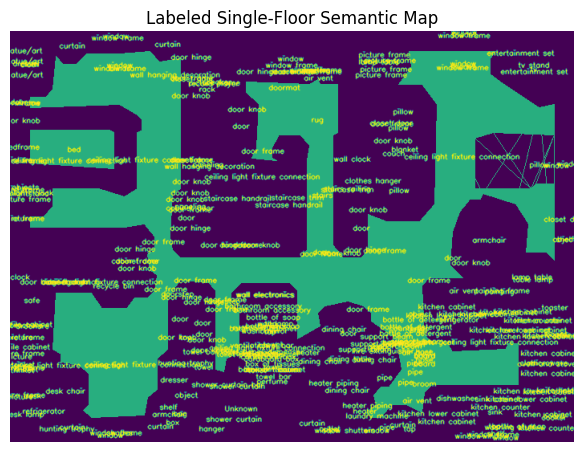

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Tuple, Dict
# Import the maps module to use as our ground-truth "oracle"
from habitat.utils.visualizations import maps

def create_labeled_semantic_map(
    env: habitat.Env,
    height_threshold: float = 2,
    font_scale: float = 0.3,
    font_thickness: int = 1
) -> (np.ndarray, Dict[str, Tuple[int, int, int]]):
    """
    Creates a single, unified map showing the traversable area of the current
    floor with centered, human-readable text labels for semantic objects.

    :param env: The active Habitat environment.
    :param height_threshold: Vertical distance to define the "floor slice".
    :param font_scale: The size of the text labels.
    :param font_thickness: The thickness of the text labels.
    :return: A tuple of (the labeled map as an RGB numpy array, a legend dict).
    """
    # --- Step 1: Derive the coordinate transformation (Proven Logic) ---
    
    metrics = env.get_metrics()
    full_map_image = metrics["top_down_map"]["map"]
    map_resolution_hw = (full_map_image.shape[0], full_map_image.shape[1])

    world_min_b, world_max_b = env.sim.pathfinder.get_bounds()
    world_min_zx = np.array([world_min_b[2], world_min_b[0]])
    world_max_zx = np.array([world_max_b[2], world_max_b[0]])
    
    pixel_min_rc = np.array(maps.to_grid(
        realworld_x=world_min_zx[0], realworld_y=world_min_zx[1],
        grid_resolution=map_resolution_hw, sim=env.sim
    ))
    pixel_max_rc = np.array(maps.to_grid(
        realworld_x=world_max_zx[0], realworld_y=world_max_zx[1],
        grid_resolution=map_resolution_hw, sim=env.sim
    ))

    delta_world = world_max_zx - world_min_zx
    delta_pixel = pixel_max_rc - pixel_min_rc
    delta_pixel[delta_pixel == 0] = 1e-6
    mpp_vec = delta_world / delta_pixel
    origin_vec = world_min_zx - (pixel_min_rc * mpp_vec)

    def world_to_map_pixels_batch(world_pos_zx, origin, mpp):
        pixel_coords = (world_pos_zx - origin) / mpp
        return pixel_coords.astype(np.int32)

    # --- Step 2: Render the Traversable Area Background (Proven Logic) ---
    
    vertices_3d = np.array(env.sim.pathfinder.build_navmesh_vertices())
    indices = np.array(env.sim.pathfinder.build_navmesh_vertex_indices())
    agent_pos = env.sim.get_agent_state().position
    agent_y = agent_pos[1]
    
    min_h, max_h = agent_y - height_threshold, agent_y + height_threshold
    faces = indices.reshape(-1, 3)
    face_vertex_heights = vertices_3d[:, 1][faces]
    on_floor_faces_mask = np.all(
        (face_vertex_heights > min_h) & (face_vertex_heights < max_h), axis=1
    )
    floor_faces = faces[on_floor_faces_mask]

    vertices_pixels_rc = world_to_map_pixels_batch(
        vertices_3d[:, [2, 0]], origin_vec, mpp_vec
    )
    floor_face_pixel_coords = vertices_pixels_rc[floor_faces]
    floor_face_pixel_coords_cr = floor_face_pixel_coords[:, :, ::-1]

    # Use a darker gray for better text contrast
    unified_map = np.zeros_like(full_map_image, dtype=np.uint8)
    cv2.fillPoly(unified_map, pts=floor_face_pixel_coords_cr, color=(80, 80, 80))

    # --- Step 3: Overlay Centered Semantic Text Labels ---
    
    scene = env.sim.semantic_scene
    category_colors = {}
    if scene.categories:
        cmap = plt.get_cmap('tab20', len(scene.categories))
        for i, cat in enumerate(scene.categories):
            if cat is not None:
                color = tuple(int(c * 255) for c in cmap(i)[:3])
                category_colors[cat.name()] = color[::-1]

    if scene.objects:
        font = cv2.FONT_HERSHEY_SIMPLEX
        for obj in scene.objects:
            center_3d = obj.obb.center
            if not (min_h < center_3d[1] < max_h):
                continue
            
            category_name = obj.category.name()
            if category_name in ['wall', 'floor', 'ceiling', 'misc']:
                continue

            center_zx = np.array([[center_3d[2], center_3d[0]]])
            pixel_center_rc = world_to_map_pixels_batch(center_zx, origin_vec, mpp_vec)[0]
            
            color = category_colors.get(category_name, (128, 128, 128))

            # --- THE CHANGE IS HERE: Replace circle with centered text ---
            
            # 1. Measure the size of the text to be drawn
            text_size, _ = cv2.getTextSize(category_name, font, font_scale, font_thickness)
            text_width, text_height = text_size
            
            # 2. Calculate the bottom-left corner `(org)` to center the text
            # OpenCV's origin for text is the bottom-left corner.
            text_org_col = pixel_center_rc[1] - text_width // 2
            text_org_row = pixel_center_rc[0] + text_height // 2
            
            # 3. Draw the text on the map
            cv2.putText(
                unified_map,
                category_name,
                (text_org_col, text_org_row), # (col, row)
                font,
                font_scale,
                (128,128,128),
                font_thickness,
                lineType=cv2.LINE_AA # For smoother text
            )

    return unified_map[:, :, ], {name: c[::-1] for name, c in category_colors.items()}


# --- Example Usage ---
env.reset()

print("Generating unified map with semantic text labels...")
labeled_map, legend_colors = create_labeled_semantic_map(env, font_scale=0.3, font_thickness=1)

# --- Display the Map and a Legend ---
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Labeled Single-Floor Semantic Map")
ax1.imshow(labeled_map)
ax1.axis('off')

# ax2 = plt.subplot(1, 2, 2)
# ax2.set_title("Legend")
# patches = [plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=np.array(color)/255.,
#             label=f"{name}")[0] for name, color in legend_colors.items() if name in set(c.name() for c in env.sim.semantic_scene.categories if c)]
# # ax2.legend(handles=patches, loc='center', fontsize='small')
ax2.axis('off')

plt.tight_layout()
plt.show()

Generating final, hybrid map with object footprints and text labels...


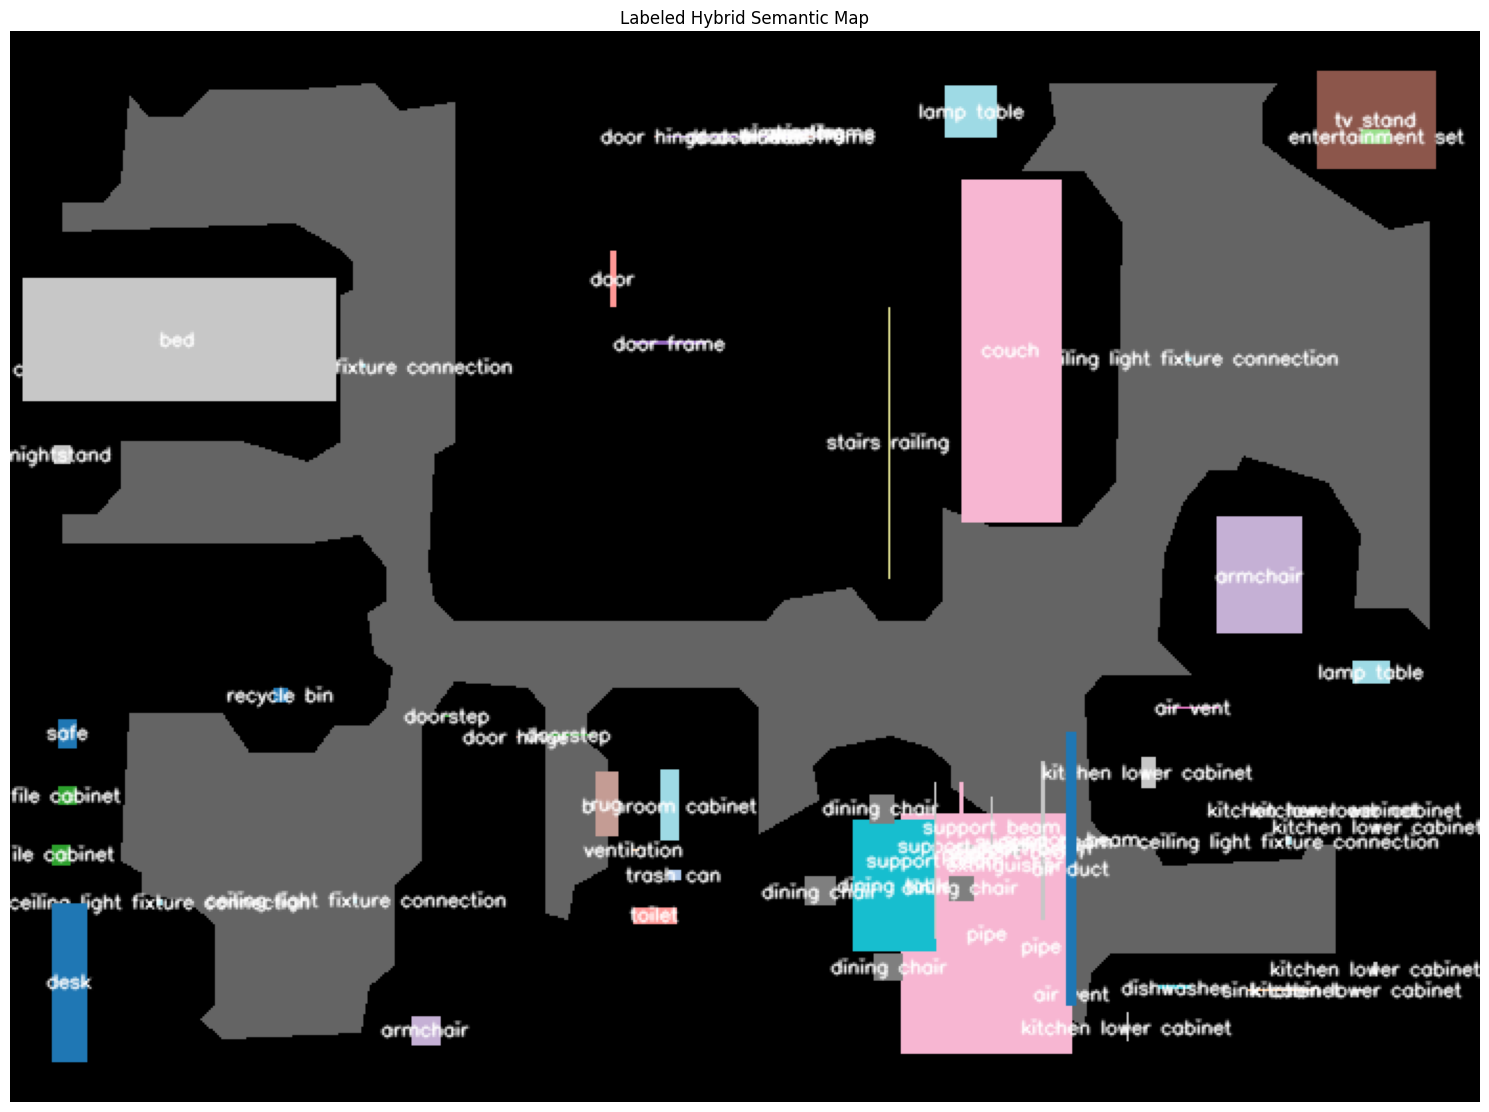

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Tuple, Dict
# Import the maps module and magnum to use as our ground-truth "oracle"
from habitat.utils.visualizations import maps
import magnum as mn

def create_final_hybrid_labeled_map(
    env: habitat.Env,
    height_threshold: float = 0.5,
    font_scale: float = 0.35,
    font_thickness: int = 1
) -> np.ndarray:
    """
    Creates the final, definitive map. It renders:
    1. The traversable area of the current floor.
    2. The colored, oriented footprint (OBB) of each semantic object.
    3. A readable text label centered on each object's footprint.

    :param env: The active Habitat environment.
    :param height_threshold: Vertical distance to define the "floor slice".
    :param font_scale: The size of the text labels.
    :param font_thickness: The thickness of the text labels.
    :return: The final, labeled map as an RGB numpy array.
    """
    # --- Step 1: Derive the correct coordinate transformation (Proven Logic) ---
    
    metrics = env.get_metrics()
    full_map_image = metrics["top_down_map"]["map"]
    map_resolution_hw = (full_map_image.shape[0], full_map_image.shape[1])

    world_min_b, world_max_b = env.sim.pathfinder.get_bounds()
    world_min_zx = np.array([world_min_b[2], world_min_b[0]])
    world_max_zx = np.array([world_max_b[2], world_max_b[0]])
    
    pixel_min_rc = np.array(maps.to_grid(
        realworld_x=world_min_zx[0], realworld_y=world_min_zx[1],
        grid_resolution=map_resolution_hw, sim=env.sim
    ))
    pixel_max_rc = np.array(maps.to_grid(
        realworld_x=world_max_zx[0], realworld_y=world_max_zx[1],
        grid_resolution=map_resolution_hw, sim=env.sim
    ))

    delta_world = world_max_zx - world_min_zx
    delta_pixel = pixel_max_rc - pixel_min_rc
    delta_pixel[delta_pixel == 0] = 1e-6
    mpp_vec = delta_world / delta_pixel
    origin_vec = world_min_zx - (pixel_min_rc * mpp_vec)

    def world_to_map_pixels_batch(world_pos_zx, origin, mpp):
        return ((world_pos_zx - origin) / mpp).astype(np.int32)

    # --- Step 2: Create the Layered Map ---
    
    # Layer 1: Start with a black, 3-channel canvas
    hybrid_map = np.zeros(full_map_image.shape + (3,), dtype=np.uint8)

    # Layer 2: Render the traversable area (medium gray)
    vertices_3d = np.array(env.sim.pathfinder.build_navmesh_vertices())
    indices = np.array(env.sim.pathfinder.build_navmesh_vertex_indices())
    agent_pos = env.sim.get_agent_state().position
    min_h, max_h = agent_pos[1] - height_threshold, agent_pos[1] + height_threshold
    
    faces = indices.reshape(-1, 3)
    face_vertex_heights = vertices_3d[:, 1][faces]
    on_floor_faces_mask = np.all(
        (face_vertex_heights > min_h) & (face_vertex_heights < max_h), axis=1
    )
    floor_faces = faces[on_floor_faces_mask]

    vertices_pixels_rc = world_to_map_pixels_batch(vertices_3d[:, [2, 0]], origin_vec, mpp_vec)
    floor_face_pixel_coords = vertices_pixels_rc[floor_faces]
    floor_face_pixel_coords_cr = floor_face_pixel_coords[:, :, ::-1]
    cv2.fillPoly(hybrid_map, pts=floor_face_pixel_coords_cr, color=(100, 100, 100))

    # --- Step 3 & 4: Overlay OBB Footprints and Text Labels ---
    
    scene = env.sim.semantic_scene
    category_colors = {}
    if scene.categories:
        cmap = plt.get_cmap('tab20', len(scene.categories))
        for i, cat in enumerate(scene.categories):
            if cat is not None:
                color = tuple(int(c * 255) for c in cmap(i)[:3])
                category_colors[cat.name()] = color[::-1]

    if scene.objects:
        font = cv2.FONT_HERSHEY_SIMPLEX
        for obj in scene.objects:
            center_3d = obj.obb.center
            if not (min_h < center_3d[1] < max_h):
                continue
            
            category_name = obj.category.name()
            if category_name in ['wall', 'floor', 'ceiling', 'misc', 'unlabeled','carpet']:
                continue

            # --- Layer 3: Draw the OBB Footprint ---
            obb = obj.obb
            transform = obb.local_to_world
            he = obb.half_extents
            local_corners = [
                mn.Vector3(-he[0], -he[1], -he[2]), mn.Vector3( he[0], -he[1], -he[2]),
                mn.Vector3( he[0],  he[1], -he[2]), mn.Vector3(-he[0],  he[1], -he[2]),
                mn.Vector3(-he[0], -he[1],  he[2]), mn.Vector3( he[0], -he[1],  he[2]),
                mn.Vector3( he[0],  he[1],  he[2]), mn.Vector3(-he[0],  he[1],  he[2]),
            ]
            world_corners_3d = [transform.transform_point(c) for c in local_corners]
            corners_world_3d_np = np.array([list(c) for c in world_corners_3d])
            corners_world_zx = corners_world_3d_np[:, [2, 0]]
            corners_pixels_rc = world_to_map_pixels_batch(corners_world_zx, origin_vec, mpp_vec)
            hull = cv2.convexHull(corners_pixels_rc[:, ::-1])
            color = category_colors.get(category_name, (150, 150, 150))
            cv2.drawContours(hybrid_map, [hull], 0, color, -1)
            
            # --- Layer 4: Draw the Text Label ---
            center_zx = np.array([[center_3d[2], center_3d[0]]])
            pixel_center_rc = world_to_map_pixels_batch(center_zx, origin_vec, mpp_vec)[0]
            
            text_size, _ = cv2.getTextSize(category_name, font, font_scale, font_thickness)
            text_width, text_height = text_size
            text_org_col = pixel_center_rc[1] - text_width // 2
            text_org_row = pixel_center_rc[0] + text_height // 2
            
            # Draw text in white for high contrast
            cv2.putText(
                hybrid_map, category_name, (text_org_col, text_org_row),
                font, font_scale, (255, 255, 255), font_thickness, lineType=cv2.LINE_AA
            )

    return hybrid_map[:, :, ::-1]


# --- Example Usage ---
env.reset()

print("Generating final, hybrid map with object footprints and text labels...")
labeled_map = create_final_hybrid_labeled_map(env, font_scale=0.3)

# --- Display the Final Map ---
plt.figure(figsize=(15, 15))
plt.title("Labeled Hybrid Semantic Map")
plt.imshow(labeled_map)
plt.axis('off')
plt.tight_layout()
plt.show()

Generating final map with dilated traversable area...


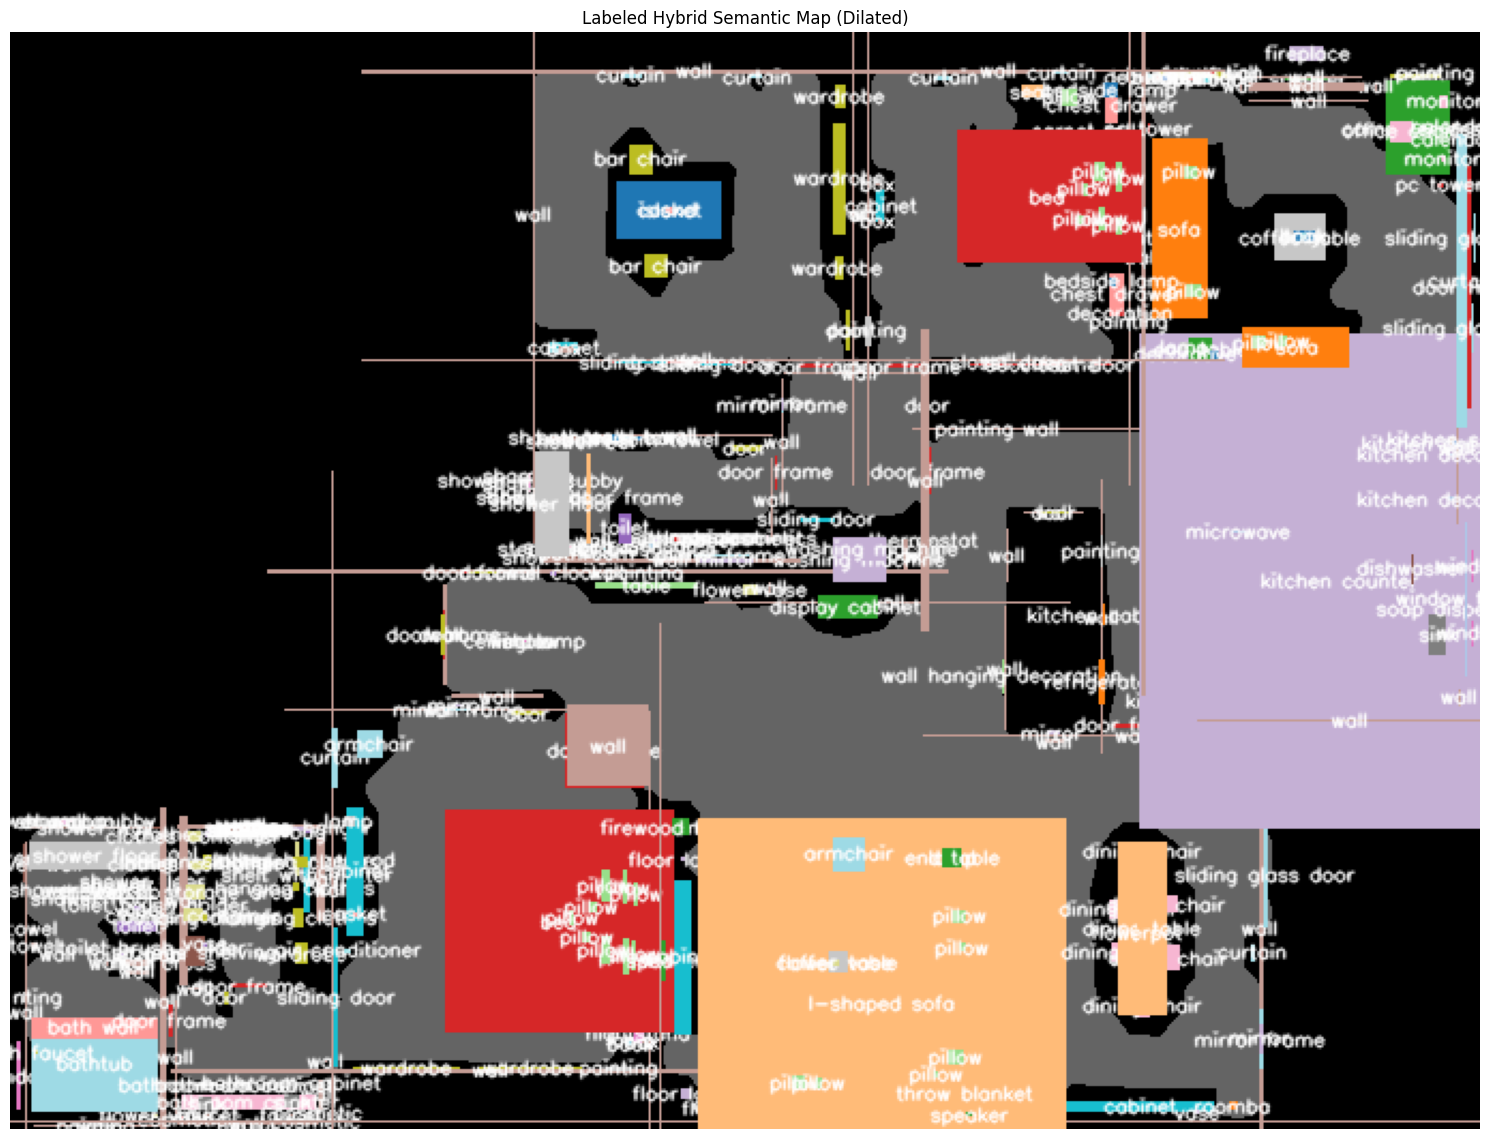

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Tuple, Dict
from habitat.utils.visualizations import maps
import magnum as mn

def create_final_hybrid_labeled_map(
    env: habitat.Env,
    height_threshold: float = 0.5,
    font_scale: float = 0.35,
    font_thickness: int = 1
) -> np.ndarray:
    """
    Creates the final, definitive map. It renders the traversable area,
    then dilates it by the agent's radius to create a visually correct
    floor plan, and finally overlays object footprints and labels.

    :param env: The active Habitat environment.
    :param height_threshold: Vertical distance to define the "floor slice".
    :param font_scale: The size of the text labels.
    :param font_thickness: The thickness of the text labels.
    :return: The final, labeled map as an RGB numpy array.
    """
    # --- Step 1: Derive the correct coordinate transformation (Proven Logic) ---
    
    metrics = env.get_metrics()
    full_map_image = metrics["top_down_map"]["map"]
    map_resolution_hw = (full_map_image.shape[0], full_map_image.shape[1])

    world_min_b, world_max_b = env.sim.pathfinder.get_bounds()
    world_min_zx = np.array([world_min_b[2], world_min_b[0]])
    world_max_zx = np.array([world_max_b[2], world_max_b[0]])
    
    pixel_min_rc = np.array(maps.to_grid(
        realworld_x=world_min_zx[0], realworld_y=world_min_zx[1],
        grid_resolution=map_resolution_hw, sim=env.sim
    ))
    pixel_max_rc = np.array(maps.to_grid(
        realworld_x=world_max_zx[0], realworld_y=world_max_zx[1],
        grid_resolution=map_resolution_hw, sim=env.sim
    ))

    delta_world = world_max_zx - world_min_zx
    delta_pixel = pixel_max_rc - pixel_min_rc
    delta_pixel[delta_pixel == 0] = 1e-6
    mpp_vec = delta_world / delta_pixel
    origin_vec = world_min_zx - (pixel_min_rc * mpp_vec)

    def world_to_map_pixels_batch(world_pos_zx, origin, mpp):
        return ((world_pos_zx - origin) / mpp).astype(np.int32)

    # --- Step 2A: Render the "Shrunken" Traversable Area ---
    
    # Start with a black, 3-channel canvas
    hybrid_map = np.zeros(full_map_image.shape + (3,), dtype=np.uint8)
    
    # Create a temporary 2D mask to hold the shrunken area
    shrunken_mask = np.zeros(map_resolution_hw, dtype=np.uint8)

    vertices_3d = np.array(env.sim.pathfinder.build_navmesh_vertices())
    indices = np.array(env.sim.pathfinder.build_navmesh_vertex_indices())
    agent_pos = env.sim.get_agent_state().position
    min_h, max_h = agent_pos[1] - height_threshold, agent_pos[1] + height_threshold
    
    faces = indices.reshape(-1, 3)
    face_vertex_heights = vertices_3d[:, 1][faces]
    on_floor_faces_mask = np.all(
        (face_vertex_heights > min_h) & (face_vertex_heights < max_h), axis=1
    )
    floor_faces = faces[on_floor_faces_mask]

    vertices_pixels_rc = world_to_map_pixels_batch(vertices_3d[:, [2, 0]], origin_vec, mpp_vec)
    floor_face_pixel_coords_cr = vertices_pixels_rc[floor_faces][:, :, ::-1]
    cv2.fillPoly(shrunken_mask, pts=floor_face_pixel_coords_cr, color=255)

    # --- Step 2B: Dilate the Traversable Area to Make it Look Correct ---

    # Get agent radius in meters and map scale
    agent_radius_meters = env.sim.get_agent(0).agent_config.radius
    # Use the average of the two axes for a robust meters_per_pixel value
    meters_per_pixel = np.mean(mpp_vec)
    
    # Calculate the dilation radius in pixels
    radius_in_pixels = int(np.round(agent_radius_meters / meters_per_pixel))
    
    # Create a circular kernel for dilation
    kernel_size = 2 * radius_in_pixels + 1
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    
    # Dilate the mask
    dilated_mask = cv2.dilate(shrunken_mask, kernel, iterations=1)
    
    # Draw the new, visually correct traversable area onto our map
    hybrid_map[dilated_mask == 255] = (100, 100, 100) # Medium gray

    # --- Step 3 & 4: Overlay OBB Footprints and Text Labels (Proven Logic) ---
    
    scene = env.sim.semantic_scene
    category_colors = {}
    if scene.categories:
        cmap = plt.get_cmap('tab20', len(scene.categories))
        for i, cat in enumerate(scene.categories):
            if cat is not None:
                color = tuple(int(c * 255) for c in cmap(i)[:3])
                category_colors[cat.name()] = color[::-1]

    if scene.objects:
        font = cv2.FONT_HERSHEY_SIMPLEX
        for obj in scene.objects:
            center_3d = obj.obb.center
            if not (min_h < center_3d[1] < max_h):
                continue
            
            category_name = obj.category.name()
            if category_name in ['floor', 'ceiling', 'misc', 'unlabeled','rug','carpet']:
                continue

            obb = obj.obb
            transform = obb.local_to_world
            half_extents = obb.half_extents
            local_corners = [
                mn.Vector3(-1, -1, -1), mn.Vector3(-1, -1, 1), mn.Vector3(-1, 1, -1), mn.Vector3(-1, 1, 1),
                mn.Vector3( 1, -1, -1), mn.Vector3( 1, -1, 1), mn.Vector3( 1, 1, -1), mn.Vector3( 1, 1, 1)
            ]
            world_corners = [transform.transform_point(c * half_extents) for c in local_corners]
            world_corners = np.array([list(c) for c in world_corners])
            
            corners_world_zx = world_corners[:, [2, 0]]
            corners_pixels_rc = world_to_map_pixels_batch(corners_world_zx, origin_vec, mpp_vec)
            
            hull = cv2.convexHull(corners_pixels_rc[:, ::-1])
            color = category_colors.get(category_name, (150, 150, 150))
            cv2.drawContours(hybrid_map, [hull], 0, color, -1)
            
            center_zx = np.array([[center_3d[2], center_3d[0]]])
            pixel_center_rc = world_to_map_pixels_batch(center_zx, origin_vec, mpp_vec)[0]
            
            text_size, _ = cv2.getTextSize(category_name, font, font_scale, font_thickness)
            text_width, text_height = text_size
            text_org_col = pixel_center_rc[1] - text_width // 2
            text_org_row = pixel_center_rc[0] + text_height // 2
            
            cv2.putText(
                hybrid_map, category_name, (text_org_col, text_org_row),
                font, font_scale, (255, 255, 255), font_thickness, lineType=cv2.LINE_AA
            )

    return hybrid_map[:, :, ::-1]

# --- Example Usage ---
env.reset()

print("Generating final map with dilated traversable area...")
labeled_map = create_final_hybrid_labeled_map(env, font_scale=0.3,height_threshold=1.5)

# --- Display the Final Map ---
plt.figure(figsize=(15, 15))
plt.title("Labeled Hybrid Semantic Map (Dilated)")
plt.imshow(labeled_map)
plt.axis('off')
plt.tight_layout()
plt.show()

Generating map by reprojecting sensor observations...


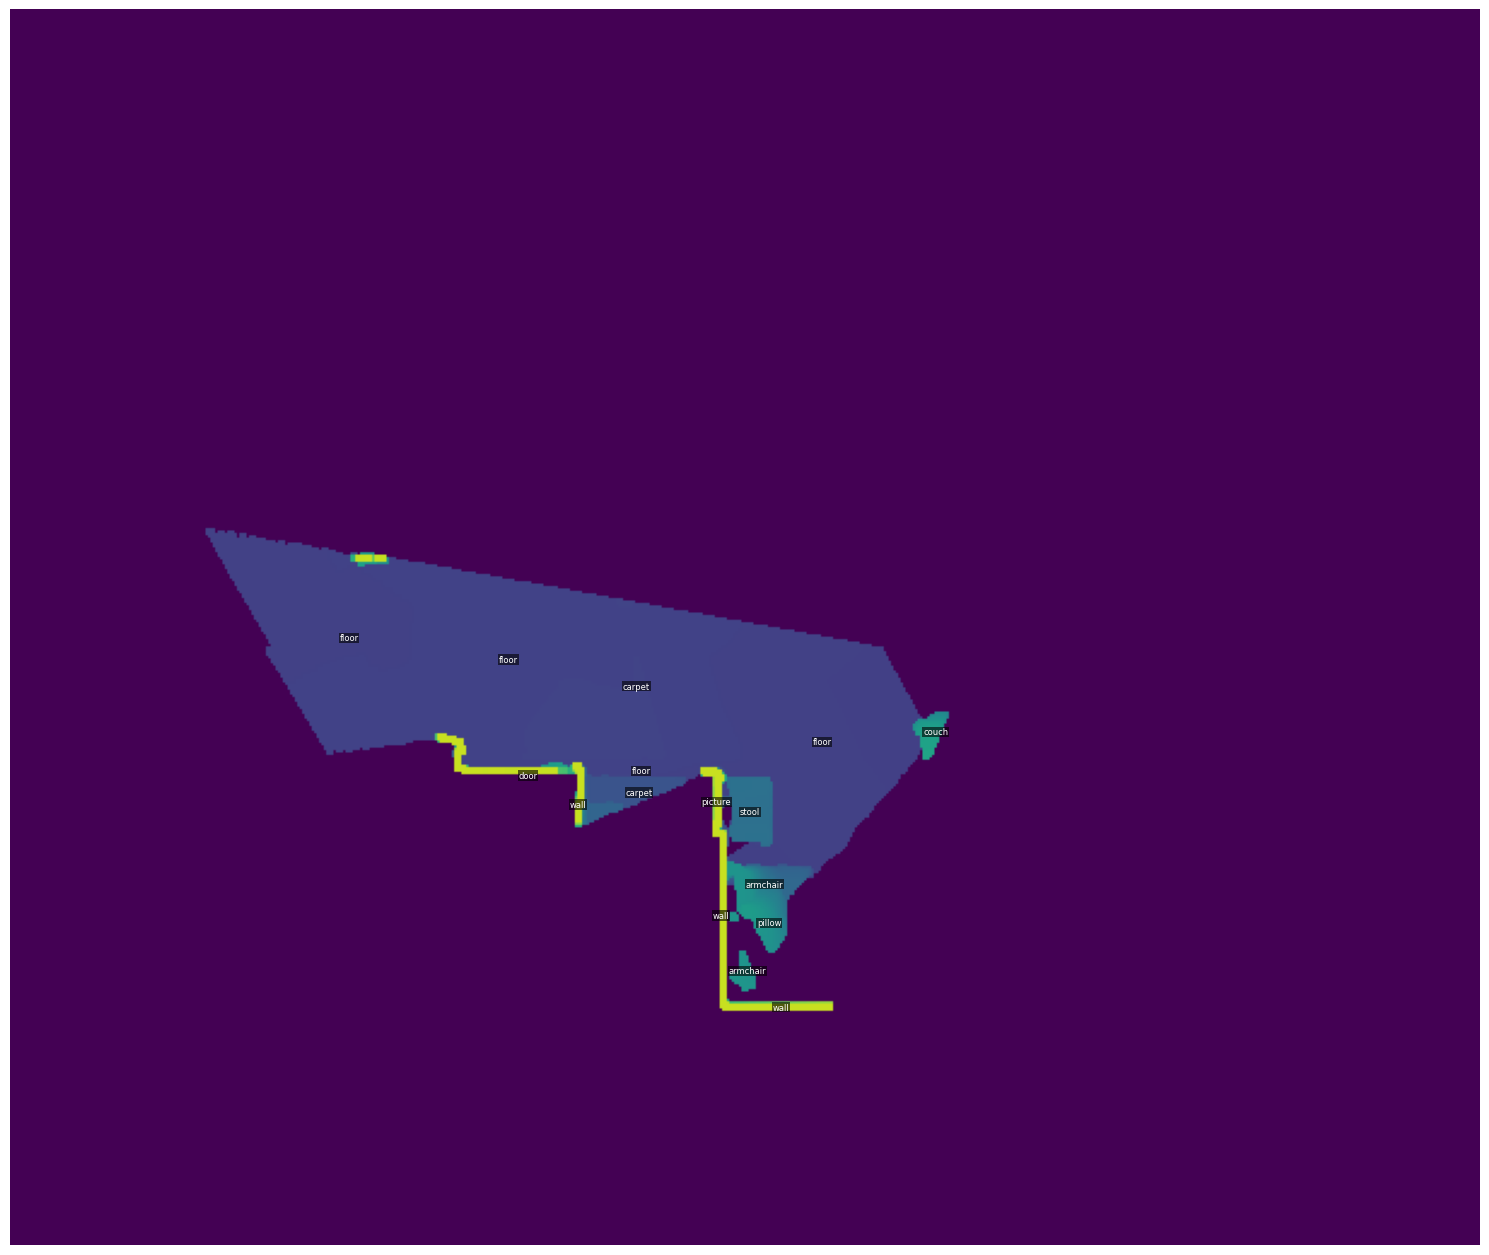

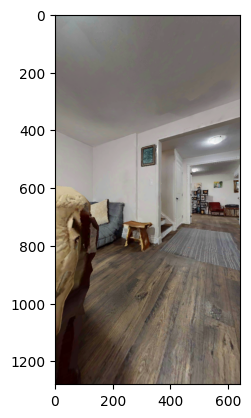

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Tuple, Dict,List
from habitat.utils.visualizations import maps
import quaternion


def get_coordinate_transform(env):
    """
    Creates and returns a fast, vectorized coordinate transformation function
    for the current environment's map.
    """
    map_shape = env.get_metrics()["top_down_map"]["map"].shape[:2]

    world_min_b, _ = env.sim.pathfinder.get_bounds()
    world_min_zx = np.array([world_min_b[2], world_min_b[0]])

    pixel_min_rc = np.array(maps.to_grid(
        realworld_x=world_min_zx[0],
        realworld_y=world_min_zx[1],
        grid_resolution=map_shape,
        sim=env.sim
    ))

    mpp = maps.calculate_meters_per_pixel(map_shape[0], sim=env.sim)
    
    origin_vec = world_min_zx - (pixel_min_rc * mpp)

    def world_to_map_pixels_batch(world_pos_zx):
        pixel_coords = (world_pos_zx - origin_vec) / mpp
        return np.round(pixel_coords).astype(np.int32)

    return world_to_map_pixels_batch

def get_semantic_pcd_world(env,obs):
    depth = np.squeeze(obs["depth"], axis=2)*5.0
    semantic_img = obs["semantic"]
    height, width = depth.shape
    agent_pos = env.sim.get_agent_state().position
    depth_sensor = env.sim.get_agent(0)._sensors["depth"]
    hfov_rad = np.deg2rad(float(depth_sensor.hfov))
    focal_length = width / (2 * np.tan(hfov_rad / 2))

    xs, ys = np.meshgrid(np.arange(width), np.arange(height))
    center_x, center_y = width / 2, height / 2
    
    # Create points in Camera Space (+X Right, +Y Up, -Z Forward)
    points_camera = np.stack([
        (xs - center_x) * depth / focal_length,
        -(ys - center_y) * depth / focal_length, # Invert Y for "Up"
        -depth
    ], axis=-1)
    
    sensor_state = env.sim.get_agent_state().sensor_states["depth"]
    
    # The final rotation is the agent's world rotation * the fix-up rotation
    final_rotation = sensor_state.rotation# * q_cam_to_agent
    
    # Apply the full, correct transformation
    points_world = quaternion.rotate_vectors(final_rotation, points_camera.reshape(-1, 3))
    points_world += sensor_state.position
    points_world = points_world.reshape(height, width, 3)
    # --- END OF FIX ---
    
    # --- Step 4: Filter, Color, and Project the Semantic Point Cloud ---
    points_world_flat = points_world.reshape(-1, 3)
    semantic_ids_flat = semantic_img.reshape(-1)
    
    valid_height_mask = (points_world_flat[:, 1] < agent_pos[1] + 1.8)#(points_world_flat[:, 1] > agent_pos[1] - 0.2) & 
    valid_depth_mask = depth.reshape(-1) < 5.0 * 0.99
    final_mask = valid_height_mask & valid_depth_mask
    
    points_to_draw = points_world_flat[final_mask]
    semantics_to_draw = semantic_ids_flat[final_mask]
    return points_to_draw,semantics_to_draw

def get_traversible_map_coords(env,height_threshold = 2,transformation = None):
    vertices_3d = np.array(env.sim.pathfinder.build_navmesh_vertices())
    indices = np.array(env.sim.pathfinder.build_navmesh_vertex_indices())
    agent_pos = env.sim.get_agent_state().position
    min_h, max_h = agent_pos[1] - height_threshold, agent_pos[1] + height_threshold
    faces = indices.reshape(-1, 3)
    face_vertex_heights = vertices_3d[:, 1][faces]
    on_floor_faces_mask = np.all((face_vertex_heights > min_h) & (face_vertex_heights < max_h), axis=1)
    floor_faces = faces[on_floor_faces_mask]
    vertices_pixels_rc = transformation(vertices_3d[:, [2, 0]])
    floor_face_pixel_coords_cr = vertices_pixels_rc[floor_faces][:, :, ::-1] #Nx3x2 triangle
    return floor_face_pixel_coords_cr
    # cv2.fillPoly(hybrid_map, pts=floor_face_pixel_coords_cr, color=(100, 100, 100))
    # return vertices_pixels_rc[floor_faces][:, :, ::-1]

def get_semantic_color_table(env):
    scene = env.sim.semantic_scene
    category_color_map = { cat.index(): [int(c*255) for c in plt.get_cmap('tab20', len(scene.categories))(i)[:3]][::-1] for i, cat in enumerate(scene.categories) if cat is not None }
    semantic_id_to_color = { obj.semantic_id: category_color_map.get(obj.category.index(), (0,0,0)) for obj in scene.objects if obj is not None and obj.category is not None }
    max_sem_id = max(semantic_id_to_color.keys()) if semantic_id_to_color else 0
    color_lookup_table = np.zeros((max_sem_id + 1, 3), dtype=np.uint8)
    for sem_id, color in semantic_id_to_color.items():
        color_lookup_table[sem_id] = color
    return color_lookup_table


def detect_major_objects(
    semantic_grid: np.ndarray,
    min_area_pixels: int = 50
) -> List[Tuple[Tuple[int, int], int]]:
    """
    Detects major object instances from a dense semantic grid using
    connected-component analysis.

    :param semantic_grid: A (H, W) NumPy array with dense semantic IDs.
    :param min_area_pixels: The minimum number of pixels for a blob to be
                            considered a "major" object.
    :return: A list where each element is a tuple containing:
             - The object's center in (row, col) pixel coordinates.
             - The object's semantic ID.
    """
    detected_objects = []
    
    # Find all unique semantic IDs present in the dense map, excluding 0 (background).
    unique_ids = np.unique(semantic_grid)
    unique_ids = unique_ids[unique_ids != 0]

    for sem_id in unique_ids:
        # Create a binary mask for the current semantic category
        binary_mask = (semantic_grid == sem_id).astype(np.uint8)
        
        # Find all distinct blobs of this category
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
            binary_mask, connectivity=8
        )
        
        # The first label (0) is always the background, so we skip it.
        for i in range(1, num_labels):
            area = stats[i, cv2.CC_STAT_AREA]
            
            # Filter out small, noisy detections
            if area >= min_area_pixels:
                # Centroid is returned as (x, y) which is (col, row)
                center_col, center_row = centroids[i]
                
                detected_objects.append(
                    ((int(center_row), int(center_col)), sem_id)
                )
                
    return detected_objects

def detect_major_objects_with_names(
    semantic_grid: np.ndarray,
    env: habitat.Env,
    min_area_pixels: int = 50
) -> list:
    """
    Detects major objects and returns their center and category name.
    """
    detected_objects = []
    unique_ids = np.unique(semantic_grid)
    unique_ids = unique_ids[unique_ids != 0]

    # Create the necessary lookup tables
    scene = env.sim.semantic_scene
    category_id_to_name = {
        cat.index(): cat.name() for cat in scene.categories if cat is not None
    }
    semantic_id_to_category_id = {
        obj.semantic_id: obj.category.index() 
        for obj in scene.objects if obj is not None and obj.category is not None
    }

    for sem_id in unique_ids:
        binary_mask = (semantic_grid == sem_id).astype(np.uint8)
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
            binary_mask, connectivity=8
        )
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] >= min_area_pixels:
                center_col, center_row = centroids[i]
                category_id = semantic_id_to_category_id.get(sem_id)
                if category_id is None: continue
                category_name = category_id_to_name.get(category_id, "unknown")
                detected_objects.append(
                    ((int(center_row), int(center_col)), category_name)
                )
    return detected_objects
import numpy as np
import cv2
def generate_filled_semantic_grid(
    sparse_semantic_grid: np.ndarray,
    kernel_size: int = 5
) -> np.ndarray:
    """
    Takes a sparse 2D grid of semantic IDs and correctly fills empty space
    using a fast, vectorized majority filter. This version includes a
    definitive fix for the argmax tie-breaking flaw.

    :param sparse_semantic_grid: A (H, W) NumPy array with semantic IDs.
    :param kernel_size: The side length of the square kernel.
    :return: A (H, W) NumPy array with holes filled.
    """
    # Find all unique semantic IDs present in the sparse map, excluding 0 (background).
    unique_ids = np.unique(sparse_semantic_grid)
    unique_ids = unique_ids[unique_ids != 0]

    if len(unique_ids) == 0:
        return sparse_semantic_grid

    # Create a stack of "count maps", one for each unique semantic ID.
    count_maps = np.zeros(
        sparse_semantic_grid.shape + (len(unique_ids),), dtype=np.int32
    )

    # Use a fast, built-in summing filter for each ID.
    for i, sem_id in enumerate(unique_ids):
        binary_mask = (sparse_semantic_grid == sem_id).astype(np.float32)
        count_maps[:, :, i] = cv2.boxFilter(
            binary_mask, -1, (kernel_size, kernel_size), normalize=False
        )
    
    # --- THE FINAL FIX IS HERE ---
    
    # 1. Find the index of the maximum count for each pixel.
    winner_indices = np.argmax(count_maps, axis=2)
    
    # 2. Find the *value* of the maximum count for each pixel.
    max_counts = np.max(count_maps, axis=2)
    
    # 3. Create the dense grid by looking up the original semantic IDs.
    dense_grid = unique_ids[winner_indices]
    
    # 4. Crucially, reset the grid to 0 wherever the max count was 0.
    #    This correctly handles empty kernels and prevents the tie-breaking bug.
    dense_grid[max_counts == 0] = 0

    # --- END OF FIX ---

    return dense_grid
from scipy.ndimage import median_filter,maximum_filter
def generate_filtered_height_grid(
    map_resolution_hw: tuple,
    pixel_coords_rc: np.ndarray,
    point_heights: np.ndarray,
    filter_size: int = 5
) -> np.ndarray:
    """
    Creates a 2D height grid from a point cloud, letting the highest point
    take precedence, and then fills holes using a median filter.

    :param map_resolution_hw: The (height, width) of the output grid.
    :param pixel_coords_rc: An (N, 2) array of (row, col) pixel coordinates.
    :param point_heights: An (N,) array of corresponding world Y-coordinates.
    :param filter_size: The side length of the square kernel for the median filter.
    :return: A (H, W) NumPy array representing the filled height grid.
    """
    # 1. Create the sparse height grid using your "highest-point-wins" logic
    sparse_height_grid = -np.ones(map_resolution_hw, dtype=np.float32)*np.Infinity
    sort_indices = np.argsort(point_heights)
    
    sorted_pixel_coords = pixel_coords_rc[sort_indices]
    sorted_heights = point_heights[sort_indices]
    
    rows, cols = sorted_pixel_coords[:, 0], sorted_pixel_coords[:, 1]
    
    # Filter out any out-of-bounds pixels before assignment
    valid_pixels = (rows >= 0) & (rows < map_resolution_hw[0]) & \
                   (cols >= 0) & (cols < map_resolution_hw[1])
                   
    sparse_height_grid[rows[valid_pixels], cols[valid_pixels]] = sorted_heights[valid_pixels]

    # 2. Use a Median Filter to fill in the holes
    # The median filter is excellent for this "salt-and-pepper" style of missing data.
    filled_height_grid = maximum_filter(
        sparse_height_grid,
        size=filter_size
    )
    
    return filled_height_grid
def create_reprojected_semantic_map(
    env: habitat.Env,
    obs: Dict,
    height_threshold: float = 0.5
) -> np.ndarray:
    """
    Creates a map by correctly reprojecting observations. This version uses a
    principled "fix-up" rotation to reconcile the camera and world coordinate systems.
    """
    # --- Step 1: Derive the map's coordinate system (Proven Logic) ---
    metrics = env.get_metrics()
    full_map_image = metrics["top_down_map"]["map"]
    map_resolution_hw = (full_map_image.shape[0], full_map_image.shape[1])

    world_to_map_pixels_batch = get_coordinate_transform(env)
    
    # --- Step 2: Create the Traversable Map --- 
    floor_face_pixel_coords_cr = get_traversible_map_coords(env,transformation=world_to_map_pixels_batch)
    
    traversible_map = np.zeros(full_map_image.shape) #create a travers
    cv2.fillPoly(traversible_map, pts=floor_face_pixel_coords_cr, color=1)

    # --- step 3: Create the semantic grid map
    semantic_grid = np.zeros(map_resolution_hw, dtype=np.int32)
    points_to_draw,semantics_to_draw = get_semantic_pcd_world(env,obs)
   
    # 1. Project all valid world points to their corresponding map pixel coordinates.
    pixel_coords_rc = world_to_map_pixels_batch(
        points_to_draw[:, [2, 0]]
    )

    # 2. Get the world-space height (Y-coordinate) for each of these points.
    point_heights = points_to_draw[:, 1]

    # 3. Get the indices that would sort the points from lowest to highest.
    # This is the core of the vectorized solution.
    sort_indices = np.argsort(point_heights)

    # 4. Apply this sorting order to both the pixel coordinates and the semantic IDs.
    # Now, the data for the highest points will appear at the end of these arrays.
    sorted_pixel_coords = pixel_coords_rc[sort_indices]
    sorted_semantics = semantics_to_draw[sort_indices]

    # 5. Perform the vectorized splatting. Because the data is sorted by height,
    # the last point written to any given pixel (the "winner") will be the highest one.
    rows, cols = sorted_pixel_coords[:, 0], sorted_pixel_coords[:, 1]
    semantic_grid[rows, cols] = sorted_semantics
    
    
    height_grid = generate_filtered_height_grid(
        map_resolution_hw,
        pixel_coords_rc,
        point_heights,
        filter_size=3
    )

    # 2. Normalize the height grid to the [0, 255] range for visualization
    # We add a small epsilon to avoid division by zero if the scene is flat
    # min_h, max_h = -0.5,2
    # min_h, max_h = point_heights.min(), point_heights.max()
    # print(min_h)
    # normalized_height_grid = (height_grid - min_h) / (max_h - min_h + 1e-6) * 255
    # normalized_height_grid = normalized_height_grid.astype(np.uint8)
    agent_pos = env.sim.get_agent_state().position
    min_h_norm = agent_pos[1] - 0.5
    max_h_norm = agent_pos[1] + 2.0

    # 2. Normalize the height grid based on this fixed range.
    #    We clip the values to ensure they stay within the [0, 1] range.
    normalized_height_grid = (height_grid - min_h_norm) / (max_h_norm - min_h_norm + 1e-6)
    normalized_height_grid = np.clip(normalized_height_grid, 0, 1) * 255
    normalized_height_grid = normalized_height_grid.astype(np.uint8)
    # 3. Apply a colormap to the height grid to create a color image
    # 'viridis' or 'jet' are good choices for visualizing height
    height_map_color = cv2.applyColorMap(normalized_height_grid, cv2.COLORMAP_VIRIDIS)

   
    # 4. Create  a fast color lookup table from the dictionary

    color_lookup_table = get_semantic_color_table(env)
    # 5. Vectorized Coloring: Create the color layer in one operation
    # semantic_color_layer = color_lookup_table[semantic_grid]

    # 6. Combine Layers: TODO: add hole filling.
    dense_semantic_grid = generate_filled_semantic_grid(semantic_grid,kernel_size=8)
    # dense_semantic_grid = semantic_grid
    # Create the color layer from the new dense grid
    dense_color_layer = color_lookup_table[dense_semantic_grid]

    # --- Apply layers in the correct order to preserve ground truth ---
    
    # Layer 1: Start with a black canvas
    hybrid_map = np.zeros(full_map_image.shape + (3,), dtype=np.uint8)

    # Layer 2: Draw the traversable area in gray
    hybrid_map[traversible_map > 0] = [100, 100, 100]
    hybrid_map = height_map_color
    # # Layer 3=: Draw the hole-filled semantic regions. This will paint over
    # # the gray traversable area but not the black unknown space.
    # fill_mask = (dense_semantic_grid > 0)*(semantic_grid==0)
    # hybrid_map[fill_mask] = dense_color_layer[fill_mask]
    
    # # Layer 4: Re-draw the original sparse semantic points on top. This is the
    # # crucial step that guarantees the original, most accurate data is
    # # perfectly preserved and not distorted by the hole-filling.
    # sparse_color_layer = color_lookup_table[semantic_grid]
    # sparse_mask = semantic_grid > 0
    # hybrid_map[sparse_mask] = sparse_color_layer[sparse_mask]
    
    
    
    major_objects = detect_major_objects_with_names(dense_semantic_grid, env,min_area_pixels=100)
    return hybrid_map[:, :, ::-1],major_objects


def plot_map_with_high_res_labels(
    map_image: np.ndarray,
    detected_objects: list,
    font_size: int = 6
):
    """
    Visualizes the map and overlays high-resolution text labels using Matplotlib.
    
    :param map_image: The background map image (RGB).
    :param detected_objects: A list of ((row, col), name) tuples.
    :param font_size: The desired font size for the labels.
    """
    plt.figure(figsize=(15, 15))
    ax = plt.gca()
    ax.imshow(map_image)

    for (center_rc, name) in detected_objects:
        row, col = center_rc
        
        # ax.text uses (x, y) which corresponds to (col, row)
        ax.text(
            col, row, name,
            color='white',
            fontsize=font_size,
            ha='center', # Horizontal alignment
            va='center', # Vertical alignment
            # Add a semi-transparent black background for readability
            bbox=dict(facecolor='black', alpha=0.6, pad=0.5, edgecolor='none')
        )
        
    ax.axis('off')
    plt.tight_layout()
    plt.show()
# --- Example Usage ---
obs = env.reset()
# obs = env.step("turn_left")
print("Generating map by reprojecting sensor observations...")
reprojected_map,major_objects = create_reprojected_semantic_map(env, obs)

# --- Display the Final Map ---
plot_map_with_high_res_labels(reprojected_map,major_objects)
plt.imshow(obs['rgb'])
# plot_top_down_map_with_heading(env)

In [ ]:
print(np.max(obs['depth']))

1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Tuple, Dict
from habitat.utils.visualizations import maps
import magnum as mn

def create_reprojected_semantic_map(
    env: habitat.Env,
    obs: Dict,
    height_threshold: float = 0.5
) -> np.ndarray:
    """
    Creates a map by correctly reprojecting observations using the simulator's
    own internal `unproject` function. This is the definitive method.
    """
    # --- Step 1: Derive the coordinate transformation (Proven Logic) ---
    metrics = env.get_metrics()
    full_map_image = metrics["top_down_map"]["map"]
    map_resolution_hw = (full_map_image.shape[0], full_map_image.shape[1])
    world_min_b, world_max_b = env.sim.pathfinder.get_bounds()
    world_min_zx = np.array([world_min_b[2], world_min_b[0]])
    world_max_zx = np.array([world_max_b[2], world_max_b[0]])
    pixel_min_rc = np.array(maps.to_grid(realworld_x=world_min_zx[0], realworld_y=world_min_zx[1], grid_resolution=map_resolution_hw, sim=env.sim))
    pixel_max_rc = np.array(maps.to_grid(realworld_x=world_max_zx[0], realworld_y=world_max_zx[1], grid_resolution=map_resolution_hw, sim=env.sim))
    delta_world = world_max_zx - world_min_zx
    delta_pixel = pixel_max_rc - pixel_min_rc
    delta_pixel[delta_pixel == 0] = 1e-6
    mpp_vec = delta_world / delta_pixel
    origin_vec = world_min_zx - (pixel_min_rc * mpp_vec)
    def world_to_map_pixels_batch(world_pos_zx, origin, mpp):
        return ((world_pos_zx - origin) / mpp).astype(np.int32)

    # --- Step 2: Create the Traversable Background ---
    hybrid_map = np.zeros(full_map_image.shape + (3,), dtype=np.uint8)
    vertices_3d = np.array(env.sim.pathfinder.build_navmesh_vertices())
    indices = np.array(env.sim.pathfinder.build_navmesh_vertex_indices())
    agent_pos = env.sim.get_agent_state().position
    min_h, max_h = agent_pos[1] - height_threshold, agent_pos[1] + height_threshold
    faces = indices.reshape(-1, 3)
    face_vertex_heights = vertices_3d[:, 1][faces]
    on_floor_faces_mask = np.all((face_vertex_heights > min_h) & (face_vertex_heights < max_h), axis=1)
    floor_faces = faces[on_floor_faces_mask]
    vertices_pixels_rc = world_to_map_pixels_batch(vertices_3d[:, [2, 0]], origin_vec, mpp_vec)
    floor_face_pixel_coords_cr = vertices_pixels_rc[floor_faces][:, :, ::-1]
    cv2.fillPoly(hybrid_map, pts=floor_face_pixel_coords_cr, color=(100, 100, 100))

    # --- Step 3: Unproject Depth to 3D Point Cloud (The Correct Way) ---
    depth = np.squeeze(obs["depth"], axis=2)
    semantic_img = obs["semantic"]
    height, width = depth.shape

    # Get the camera's intrinsic and extrinsic properties
    depth_sensor = env.sim.get_agent(0)._sensors["depth"]
    render_camera = depth_sensor.render_camera
    
    # This is the matrix that transforms from camera view space to world space
    camera_to_world = render_camera.camera_matrix

    # Create a list to hold the final world points
    points_world = []
    semantic_ids_for_points = []
    
    # Iterate through each pixel to unproject it
    for r in range(height):
        for c in range(width):
            depth_value = depth[r, c]
            
            # Skip points at max depth
            if depth_value >= 5.0 * 0.99:
                continue
                
            # Unproject the pixel using the simulator's own function
            # This returns a point in the CAMERA's local coordinate system
            point_camera = render_camera.unproject(mn.Vector2i(c, r), depth_value)
            
            # Transform the point from camera space to world space
            point_world = camera_to_world.transform_point(point_camera)
            
            points_world.append(list(point_world))
            semantic_ids_for_points.append(semantic_img[r, c])

    if not points_world:
        return hybrid_map[:, :, ::-1]

    # --- Step 4: Filter, Color, and Project the Semantic Point Cloud ---
    points_world_flat = np.array(points_world)
    semantic_ids_flat = np.array(semantic_ids_for_points)
    
    valid_height_mask = (points_world_flat[:, 1] > agent_pos[1] - 0.2) & (points_world_flat[:, 1] < agent_pos[1] + 1.8)
    
    points_to_draw = points_world_flat[valid_height_mask]
    semantics_to_draw = semantic_ids_flat[valid_height_mask]
    
    scene = env.sim.semantic_scene
    category_color_map = { cat.index(): [int(c*255) for c in plt.get_cmap('tab20', len(scene.categories))(i)[:3]][::-1] for i, cat in enumerate(scene.categories) if cat is not None }
    semantic_id_to_color = { obj.semantic_id: category_color_map.get(obj.category.index(), (0,0,0)) for obj in scene.objects if obj is not None and obj.category is not None }
    
    if len(points_to_draw) > 0:
        pixel_coords_rc = world_to_map_pixels_batch(points_to_draw[:, [2, 0]], origin_vec, mpp_vec)
        for pixel, sem_id in zip(pixel_coords_rc, semantics_to_draw):
            color_bgr = semantic_id_to_color.get(sem_id)
            if color_bgr:
                cv2.circle(hybrid_map, (pixel[1], pixel[0]), radius=1, color=color_bgr, thickness=-1)

    return hybrid_map[:, :, ::-1]

# --- Example Usage ---
obs = env.reset()
for _ in range(30):
    obs = env.step("turn_left")
for _ in range(15):
    obs = env.step("move_forward")

print("Generating map by reprojecting sensor observations...")
reprojected_map = create_reprojected_semantic_map(env, obs)

# --- Display the Final Map ---
plt.figure(figsize=(10, 10))
plt.title("Reprojected Semantic Map (Corrected)")
plt.imshow(reprojected_map)
plt.axis('off')
plt.tight_layout()
plt.show()

Generating map by reprojecting sensor observations...


TypeError: transform_point(): incompatible function arguments. The following argument types are supported:
    1. (self: _magnum.Matrix4, vector: _magnum.Vector3) -> _magnum.Vector3

Invoked with: Matrix(-0.421459, -0, 0.906847, -0.924108,
       0, 1, -0, 1.7284,
       -0.906847, -0, -0.421459, -3.44643,
       -0, 0, -0, 1), <habitat_sim._ext.habitat_sim_bindings.Ray object at 0x7f9b07f6c8f0>

Plotting the current top-down map with agent heading...


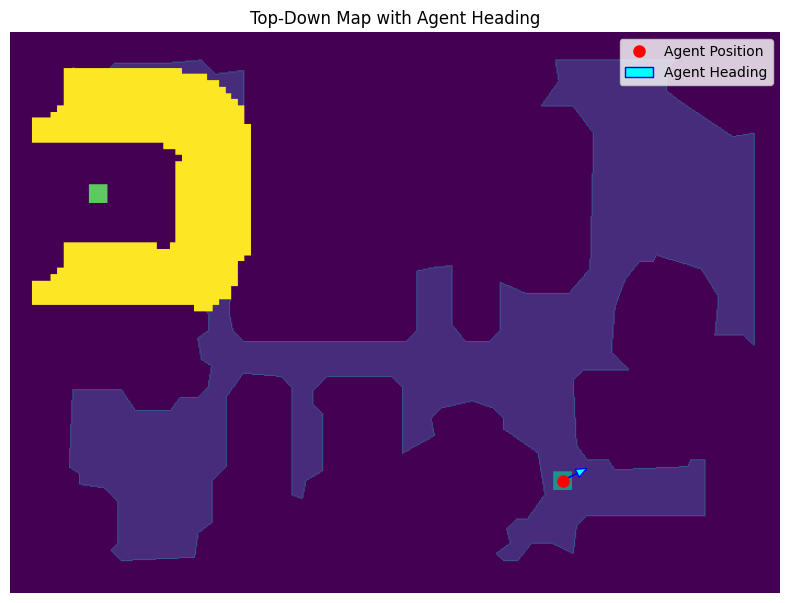

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_top_down_map_with_heading(env: habitat.Env):
    """
    Gets the TopDownMap from the environment's metrics and plots it,
    adding a marker for the agent's position and an arrow for its heading.

    :param env: The active Habitat environment with the TopDownMap measurement enabled.
    """
    # --- 1. Get the necessary information from the metrics ---
    metrics = env.get_metrics()
    if "top_down_map" not in metrics:
        print("Error: 'top_down_map' measurement not found.")
        return
        
    top_down_map_info = metrics["top_down_map"]
    
    # The map image itself (the canvas)
    map_image = top_down_map_info["map"]
    
    # The agent's position in pixel coordinates (row, col)
    agent_pixel_pos_rc = top_down_map_info["agent_map_coord"][0]
    
    # The agent's heading angle in radians.
    # The TopDownMap metric conveniently calculates this for us.
    agent_angle_rad = top_down_map_info["agent_angle"][0]

    # --- 2. Set up the plot ---
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_title("Top-Down Map with Agent Heading")
    
    # Display the map image as the background
    ax.imshow(map_image)
    
    # --- 3. Plot the agent's position and heading ---
    
    # Matplotlib's plotting functions expect (x, y), which corresponds to (col, row)
    agent_x, agent_y = agent_pixel_pos_rc[1], agent_pixel_pos_rc[0]

    # Plot a red dot for the agent's center
    ax.plot(agent_x, agent_y, 'ro', markersize=8, label='Agent Position')
    
    # Calculate the endpoint of the heading arrow
    arrow_length = 25  # in pixels
    # The angle is a standard mathematical angle (0 is east, positive is CCW).
    # On an image, this translates to:
    # dx = length * cos(angle) -> THIS IS WRONG for Habitat's angle
    # dy = length * sin(angle) -> THIS IS WRONG for Habitat's angle
    # After careful review of the source code, the angle is calculated as
    # atan2(forward_x, -forward_z). This means the heading vector in pixel space is:
    heading_dy = -arrow_length * np.cos(agent_angle_rad)
    heading_dx = arrow_length * np.sin(agent_angle_rad) # Y is inverted in image coordinates
    
    # Plot the heading arrow
    ax.arrow(
        agent_x,
        agent_y,
        heading_dx,
        -heading_dy,
        length_includes_head=True,
        head_width=8,
        head_length=10,
        fc='cyan',
        ec='blue',
        label='Agent Heading'
    )
    
    ax.legend(loc='upper right')
    ax.axis('off')
    plt.tight_layout()
    plt.show()


# --- Example Usage ---
# Make sure your 'env' is active and has observations/metrics
# obs = env.reset() 
# or 
# obs = env.step(...)

print("Plotting the current top-down map with agent heading...")
plot_top_down_map_with_heading(env)


Rendering traversable area for the agent's current floor...


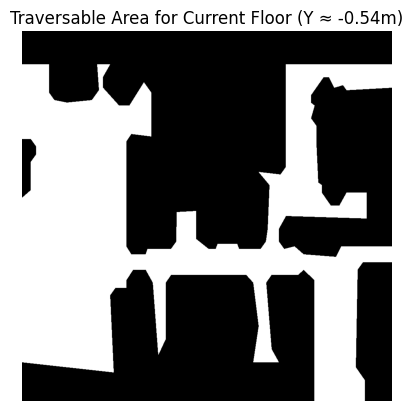

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Tuple

def plot_current_floor_traversable_area(
    env: habitat.Env,
    map_resolution: Tuple[int, int] = (1024, 1024),
    height_threshold: float = 0.5  # Meters above/below agent to include
):
    """
    Correctly plots the traversable area for only the agent's current floor
    by filtering the NavMesh triangles by height.

    :param env: The active Habitat environment.
    :param map_resolution: The (width, height) of the output map image.
    :param height_threshold: Vertical distance to define the "floor slice".
    """
    # --- 1. Get NavMesh Geometry and Agent Height ---
    
    vertices_3d = np.array(env.sim.pathfinder.build_navmesh_vertices())
    indices = np.array(env.sim.pathfinder.build_navmesh_vertex_indices())
    agent_pos = env.sim.get_agent_state().position
    agent_y = agent_pos[1]

    if len(vertices_3d) == 0 or len(indices) == 0:
        print("No NavMesh data found.")
        return

    # --- 2. Filter Triangles by Height ---

    # Get the height (Y-coordinate) for every vertex
    vertex_heights = vertices_3d[:, 1]
    
    # Define the min and max height for our floor slice
    min_h, max_h = agent_y - height_threshold, agent_y + height_threshold
    
    # Reshape indices into faces
    faces = indices.reshape(-1, 3)
    
    # Get the heights of all three vertices for each face
    face_vertex_heights = vertex_heights[faces]
    
    # A face is on the current floor if ALL of its vertices are within the height slice.
    # The `np.all(..., axis=1)` is the key to this logic.
    on_floor_faces_mask = np.all(
        (face_vertex_heights > min_h) & (face_vertex_heights < max_h),
        axis=1
    )
    
    # Keep only the faces that are on the current floor
    floor_faces = faces[on_floor_faces_mask]
    
    if len(floor_faces) == 0:
        print(f"No NavMesh triangles found on the current floor (Y ≈ {agent_y:.2f}m).")
        return

    # --- 3. Render the Filtered Triangles ---
    
    # Establish a coordinate system based on the FULL NavMesh for consistency
    vertices_2d_world = vertices_3d[:, [0, 2]]
    min_xz = np.min(vertices_2d_world, axis=0)
    max_xz = np.max(vertices_2d_world, axis=0)
    scene_size = max_xz - min_xz
    scene_size[scene_size < 1e-6] = 1e-6

    def world_to_grid_batch(world_pos_xz_array):
        rel_pos = world_pos_xz_array - min_xz
        grid_pos = (rel_pos / scene_size) * np.array([map_resolution[0] - 1, map_resolution[1] - 1])
        return grid_pos.astype(np.int32)

    traversable_map = np.zeros((map_resolution[1], map_resolution[0]), dtype=np.uint8)
    vertices_2d_pixels = world_to_grid_batch(vertices_2d_world)
    
    # Get the pixel coordinates for the vertices of only the floor-filtered faces
    floor_face_pixel_coords = vertices_2d_pixels[floor_faces]
    
    cv2.fillPoly(traversable_map, pts=floor_face_pixel_coords, color=255)
    
    # --- 4. Display the Clean Map ---
    
    plt.figure(figsize=(8, 8))
    plt.title(f"Traversable Area for Current Floor (Y ≈ {agent_y:.2f}m)")
    plt.imshow(traversable_map, cmap='gray')
    plt.axis('off')
    plt.show()

# --- Example Usage ---
# env.reset()
# You can optionally move the agent around here to test different floors
print("Rendering traversable area for the agent's current floor...")
plot_current_floor_traversable_area(env)

In [ ]:
# Get the full metrics dictionary
metrics = env.get_metrics()

# Extract the map and its coordinate system parameters
top_down_map_info = metrics["top_down_map"]
full_map_image = top_down_map_info["map"]
map_origin = top_down_map_info["map_origin"] # World (X,Z) of pixel (0,0)
meters_per_pixel = top_down_map_info["meters_per_pixel"]

KeyError: 'map_origin'

Creating the final, correctly aligned single-floor mask...


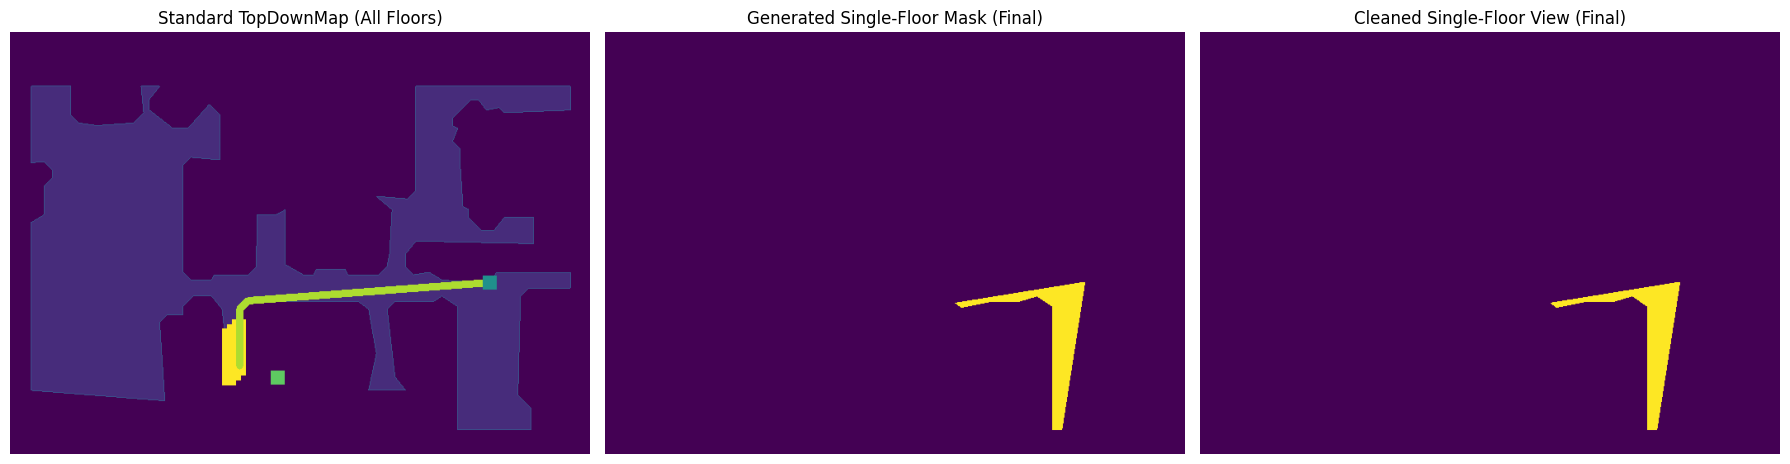

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from typing import Tuple
from habitat.utils.visualizations import maps

def create_single_floor_mask_final(
    env: habitat.Env,
    height_threshold: float = 0.5
) -> (np.ndarray, np.ndarray):
    """
    Creates a perfectly aligned single-floor mask by deriving the transformation
    from `maps.to_grid` and respecting the (Z,X)->(row,col) mapping from the
    source code.

    :param env: The active Habitat environment.
    :param height_threshold: Vertical distance to define the "floor slice".
    :return: A tuple of (the floor mask, the original TopDownMap image).
    """
    # --- Step 1: Derive the correct coordinate transformation ---
    
    metrics = env.get_metrics()
    full_map_image = metrics["top_down_map"]["map"]
    map_resolution_hw = (full_map_image.shape[0], full_map_image.shape[1])

    world_min_b, world_max_b = env.sim.pathfinder.get_bounds()

    # Probe the oracle function with the correct argument order (Z, X)
    pixel_min_rc = np.array(maps.to_grid(
        realworld_x=world_min_b[2], realworld_y=world_min_b[0], # Z is first, X is second
        grid_resolution=map_resolution_hw, sim=env.sim
    ))

    # Solve for scale and origin based on this mapping
    world_min_zx = np.array([world_min_b[2], world_min_b[0]])
    mpp_vec = maps.calculate_meters_per_pixel(512,env.sim)

    origin_vec = world_min_zx - (pixel_min_rc * mpp_vec)

    # Create our fast, vectorized projection function
    def world_to_map_pixels_batch(world_pos_zx, origin, mpp):
        pixel_coords = (world_pos_zx - origin) / mpp
        return np.round(pixel_coords).astype(np.int32)

    # --- Step 2: Get NavMesh geometry (Proven Logic) ---
    
    vertices_3d = np.array(env.sim.pathfinder.build_navmesh_vertices())
    indices = np.array(env.sim.pathfinder.build_navmesh_vertex_indices())
    agent_pos = env.sim.get_agent_state().position
    
    min_h, max_h = agent_pos[1] - height_threshold, agent_pos[1] + height_threshold
    faces = indices.reshape(-1, 3)
    face_vertex_heights = vertices_3d[:, 1][faces]
    on_floor_faces_mask = np.all(
        (face_vertex_heights > min_h) & (face_vertex_heights < max_h), axis=1
    )
    floor_faces = faces[on_floor_faces_mask]

    if len(floor_faces) == 0:
        return np.zeros_like(full_map_image, dtype=np.uint8)[:,:,0], full_map_image

    # --- Step 3: Project Floor Triangles Using the Corrected Transform ---
    
    # Convert all 3D vertices to 2D pixel coordinates, passing (Z, X)
    vertices_pixels_rc = world_to_map_pixels_batch(
        vertices_3d[:, [2, 0]], origin_vec, mpp_vec # Pass Z first, then X
    )
    
    # Get the pixel coordinates for the vertices of our filtered floor faces
    floor_face_pixel_coords = vertices_pixels_rc[floor_faces]
    
    # OpenCV expects points in (col, row) order, so we swap the columns
    floor_face_pixel_coords_cr = floor_face_pixel_coords[:, :, ::-1]

    # --- Step 4: Draw the Triangles onto the Mask ---

    floor_mask = np.zeros(map_resolution_hw, dtype=np.uint8)
    cv2.fillPoly(floor_mask, pts=floor_face_pixel_coords_cr, color=255)
    
    return floor_mask, full_map_image

# --- Example Usage ---
env.reset()
metrics = env.get_metrics()
print("Creating the final, correctly aligned single-floor mask...")
floor_mask, full_map = create_single_floor_mask_final(env,height_threshold=1)

# Use the mask to create a clean view
clean_floor_map = (cv2.bitwise_and(full_map, full_map, mask=floor_mask)>0)*metrics["top_down_map"]["fog_of_war_mask"]
overlay = full_map + floor_mask
# --- Display for Comparison ---
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Standard TopDownMap (All Floors)")
plt.imshow(full_map)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Generated Single-Floor Mask (Final)")
plt.imshow(metrics["top_down_map"]["fog_of_war_mask"])#(full_map>0)^(floor_mask>0), cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Cleaned Single-Floor View (Final)")
plt.imshow(clean_floor_map)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
try:
    meters_per_pixel = config_env.habitat.task.measurements.top_down_map
except Exception:
    raise ValueError("Could not find 'meters_per_pixel' in the config. Please ensure the TopDownMap measurement is configured correctly.")

In [ ]:
meters_per_pixel

{'type': 'TopDownMap', 'max_episode_steps': 1000, 'map_padding': 3, 'map_resolution': 512, 'draw_source': True, 'draw_border': True, 'draw_shortest_path': True, 'draw_view_points': True, 'draw_goal_positions': True, 'draw_goal_aabbs': True, 'fog_of_war': {'draw': True, 'visibility_dist': 5.0, 'fov': 72}}

In [ ]:
metrics = env.get_metrics()
top_down_map_info = metrics["top_down_map"]
top_down_map_info

{'map': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'fog_of_war_mask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'agent_map_coord': [(28, 535)],
 'agent_angle': [array(-2.57873245)]}

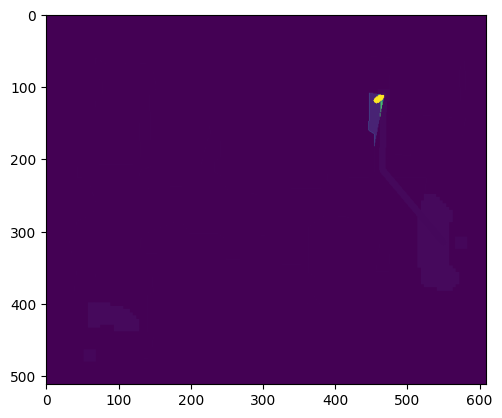

In [ ]:
env.reset()
env.step(1)

mask = env.get_metrics()['top_down_map']['fog_of_war_mask']

map = env.get_metrics()['top_down_map']['map']
# plt.imshow()
plt.imshow(map*mask+0.03*map*(1-mask))

/tmp/ipykernel_295837/1583733405.py:28: DeprecationWarning: Please use `generate_binary_structure` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  kernel = ndimage.morphology.generate_binary_structure(2, 1)


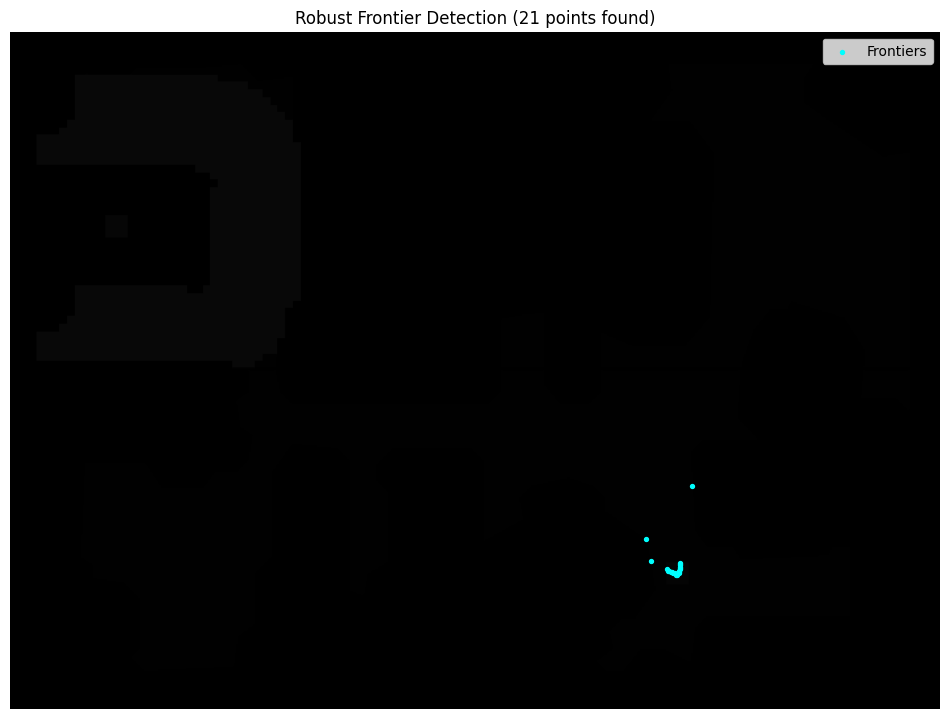

In [ ]:
# env.reset()
plot_frontiers(map,mask)
# plt.imshow(map,cmap='grey')

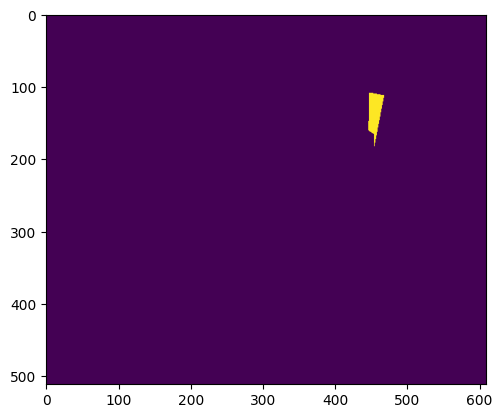

In [ ]:
plt.imshow(mask)

In [ ]:
from habitat.tasks.nav.shortest_path_follower import ShortestPathFollower
env.reset()

{'rgb': array([[[123, 116, 107],
         [123, 116, 107],
         [123, 116, 107],
         ...,
         [222, 219, 222],
         [222, 219, 222],
         [222, 219, 222]],
 
        [[123, 116, 107],
         [123, 116, 107],
         [123, 116, 107],
         ...,
         [222, 219, 222],
         [222, 219, 222],
         [222, 219, 222]],
 
        [[123, 116, 107],
         [123, 116, 107],
         [123, 116, 107],
         ...,
         [207, 205, 207],
         [197, 196, 197],
         [190, 189, 190]],
 
        ...,
 
        [[ 52,  19,  11],
         [ 52,  19,  11],
         [ 52,  19,  11],
         ...,
         [129, 121, 112],
         [129, 121, 112],
         [129, 121, 112]],
 
        [[ 52,  19,  11],
         [ 50,  17,  12],
         [ 48,  15,  12],
         ...,
         [129, 121, 112],
         [129, 121, 112],
         [129, 121, 112]],
 
        [[ 48,  15,  12],
         [ 46,  14,  13],
         [ 46,  14,  13],
         ...,
         [129, 121, 1

In [ ]:
env.current_episode.goals[0].position

[2.47898, -0.08587, -0.273]

In [ ]:
path = habitat_sim.MultiGoalShortestPath()
path.requested_start = env.sim.get_agent_state().position
path.requested_ends = [goal.position for goal in env.current_episode.goals]
env.sim.pathfinder.find_path(path)

True

In [ ]:
path.closest_end_point_index

6

In [ ]:
env.reset()

{'rgb': array([[[136, 120, 103],
         [137, 120, 104],
         [137, 120, 104],
         ...,
         [193, 200, 207],
         [193, 200, 207],
         [193, 200, 207]],
 
        [[136, 120, 103],
         [137, 120, 104],
         [137, 120, 104],
         ...,
         [193, 200, 207],
         [193, 200, 207],
         [193, 200, 207]],
 
        [[136, 120, 103],
         [137, 120, 104],
         [137, 120, 104],
         ...,
         [193, 200, 207],
         [189, 195, 203],
         [189, 195, 203]],
 
        ...,
 
        [[141,  86,  30],
         [141,  86,  30],
         [127,  70,  16],
         ...,
         [210, 186, 165],
         [199, 175, 153],
         [199, 175, 153]],
 
        [[141,  86,  30],
         [132,  72,  24],
         [108,  46,   3],
         ...,
         [243, 229, 214],
         [210, 186, 165],
         [210, 186, 165]],
 
        [[107,  52,  10],
         [100,  44,   6],
         [100,  44,   6],
         ...,
         [243, 229, 2

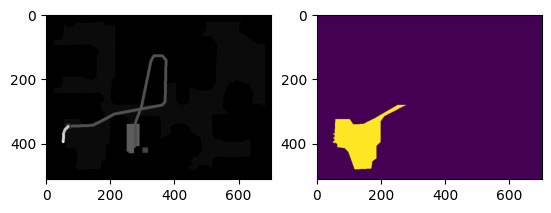

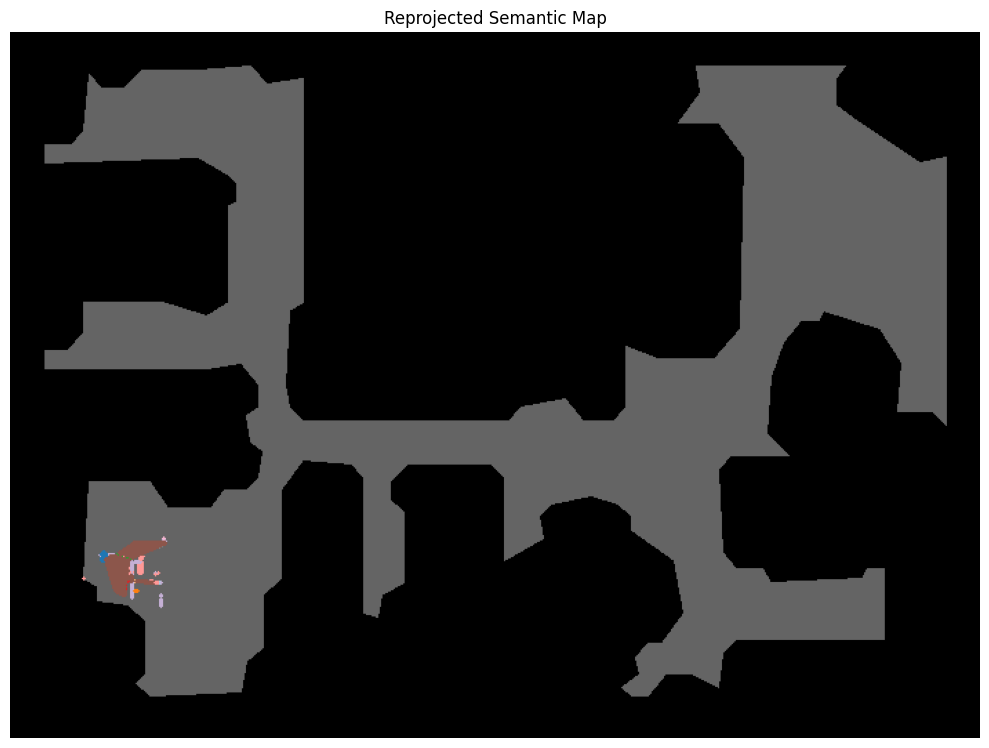

1


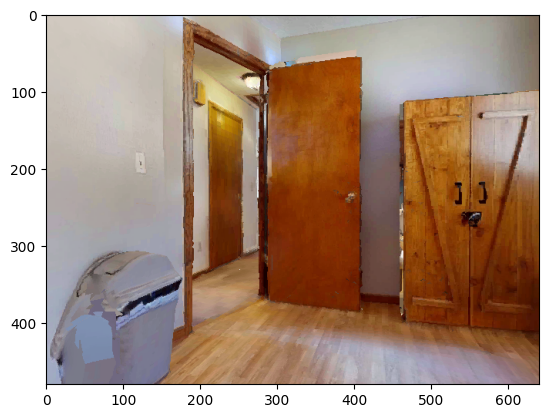

In [ ]:
from habitat.tasks.nav.shortest_path_follower import ShortestPathFollower
import habitat_sim
follower = ShortestPathFollower(env.sim,0.5,False)
# action =2

path = habitat_sim.MultiGoalShortestPath()
path.requested_start = env.sim.get_agent_state().position
path.requested_ends = [goal.position for goal in env.current_episode.goals]
env.sim.pathfinder.find_path(path)
action = follower.get_next_action(np.array(env.current_episode.goals[path.closest_end_point_index].position))

map = env.get_metrics()['top_down_map']['map']
mask = env.get_metrics()['top_down_map']['fog_of_war_mask']
# plt.imshow()
# plot_frontiers#+0.03*map*(1-mask),cmap='grey')
fig,axs = plt.subplots(1,2)
axs[0].imshow(map,cmap="grey")
axs[1].imshow(mask)
plt.show()
# plot_frontiers(map,mask)
reprojected_map = create_reprojected_semantic_map(env, obs)

# --- Display the Final Map ---
plt.figure(figsize=(10, 10))
plt.title("Reprojected Semantic Map")
plt.imshow(reprojected_map)
plt.axis('off')
plt.tight_layout()
plt.show()
# plt.imshow(map)
# print(f"Step {env.step_count}: Agent decides to '{action_name}'")
print(action)
plt.imshow(obs['rgb'])
# if(action==0):
#     env.reset()
# obs = env.step(action)



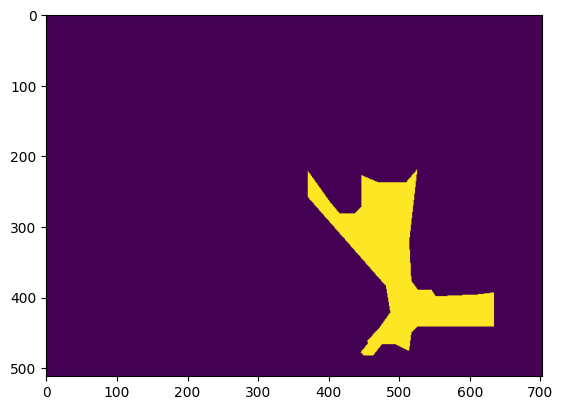

In [ ]:
plt.imshow(mask)

In [ ]:
from habitat.utils.visualizations import maps
from typing import TYPE_CHECKING, Union, cast
top_down_map = maps.get_topdown_map_from_sim(
            cast("HabitatSim", env.sim), map_resolution=1024
        )

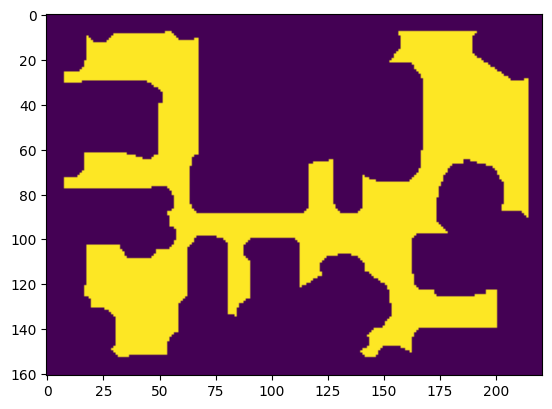

In [ ]:
plt.imshow(env.sim.pathfinder.get_topdown_view(0.05,2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2 # Used for drawing the agent marker

def get_current_floor_map(
    env: habitat.Env,
    map_size_pixels: int = 512,
    height_threshold: float = 0.5
) -> np.ndarray:
    """
    Generates a 2D top-down map of only the current floor the agent is on.

    It works by filtering the scene's navigation mesh vertices by height
    relative to the agent's current position.

    :param env: The active Habitat environment.
    :param map_size_pixels: The desired size of the output map image in pixels.
    :param height_threshold: The vertical distance (in meters) to define a "floor".
                             All NavMesh points within agent_y +/- this value will be included.
    :return: A 2D numpy array representing the single-floor map.
    """
    # 1. Get agent's current height (Y-coordinate)
    agent_pos = env.sim.get_agent_state().position
    agent_y = agent_pos[1]

    # 2. Get all 3D vertices of the navigation mesh for the entire scene
    all_nav_vertices = np.array(env.sim.pathfinder.nav_mesh_vertices)
    if len(all_nav_vertices) == 0:
        return np.zeros((map_size_pixels, map_size_pixels), dtype=np.uint8)

    # 3. Filter vertices to keep only those on the current floor
    floor_vertices = all_nav_vertices[
        np.abs(all_nav_vertices[:, 1] - agent_y) < height_threshold
    ]
    if len(floor_vertices) == 0:
        return np.zeros((map_size_pixels, map_size_pixels), dtype=np.uint8)

    # 4. Project the 3D floor vertices to a 2D plane (X, Z)
    floor_points_2d = floor_vertices[:, [0, 2]]

    # 5. Calculate the bounding box and scale to fit the map size
    min_xz = np.min(floor_points_2d, axis=0)
    max_xz = np.max(floor_points_2d, axis=0)
    world_size = max_xz - min_xz
    
    # Handle the case where the floor is a single point or line
    if np.any(world_size < 1e-5):
        world_size[world_size < 1e-5] = 1e-5

    # Determine the scale to fit the larger dimension into map_size_pixels
    scale = (map_size_pixels - 1) / np.max(world_size)

    # 6. Convert world coordinates to pixel coordinates
    pixel_coords = ((floor_points_2d - min_xz) * scale).astype(int)

    # 7. Render the map by drawing the points
    floor_map = np.zeros((map_size_pixels, map_size_pixels), dtype=np.uint8)
    # Note the index order: [row, col] -> [y, x]
    floor_map[pixel_coords[:, 1], pixel_coords[:, 0]] = 255
    
    # 8. Fill in the gaps between points using a morphological operation
    # A "closing" operation (dilation then erosion) is great for this.
    floor_map = ndimage.binary_closing(floor_map, iterations=3).astype(np.uint8) * 255
    
    # 9. Draw the agent's position on the map
    agent_pixel_coord = tuple(((agent_pos[[0, 2]] - min_xz) * scale).astype(int))
    # Convert to RGB to draw a colored marker
    floor_map_rgb = cv2.cvtColor(floor_map, cv2.COLOR_GRAY2BGR)
    cv2.circle(
        img=floor_map_rgb,
        center=(agent_pixel_coord[0], agent_pixel_coord[1]),
        radius=5,
        color=(0, 0, 255), # Red in BGR format
        thickness=-1
    )

    return floor_map_rgb

# --- Example Usage ---

# Make sure your 'env' is active. Let's navigate up some stairs if possible.
# This simple agent will just spin, but you can replace with a follower.
# env.reset()
# for _ in range(50):
#     action = env.action_space.sample()
#     if "move" in list(action.keys())[0]: # Try to move, not just turn
#         env.step(action)

print("Generating map for current floor...")
current_floor_map = get_current_floor_map(env, map_size_pixels=512)

print("Generating standard (multi-floor) top-down map for comparison...")
standard_map = env.get_metrics()["top_down_map"]["map"]


# --- Display for Comparison ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Clean Single-Floor Map (from NavMesh)")
plt.imshow(current_floor_map)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Standard Top-Down Map (All Floors)")
plt.imshow(standard_map)
plt.axis('off')

plt.tight_layout()
plt.show()

Generating map for current floor...


AttributeError: 'habitat_sim._ext.habitat_sim_bindings.PathFinder' object has no attribute 'nav_mesh_vertices'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def plot_frontiers(
    top_down_map: np.ndarray,
    fog_of_war_mask: np.ndarray,
    safety_margin: int = 3
):
    """
    Detects and plots frontiers with a safety margin to avoid false positives
    near walls or inside the explored area.

    :param top_down_map: 2D numpy array (grayscale map).
    :param fog_of_war_mask: 2D boolean numpy array where True is explored.
    :param safety_margin: Number of pixels to erode the navigable area by,
                          creating a margin from walls.
    """
    # --- 1. Identify "Safely Navigable" Space ---
    # Start with the basic navigable mask.
    navigable_mask = (top_down_map > 0)
    
    # Erode the mask to create a safety margin. This is the crucial step
    # to eliminate points that are too close to walls.
    kernel = ndimage.morphology.generate_binary_structure(2, 1)
    safely_navigable_mask = ndimage.binary_erosion(
        navigable_mask, structure=kernel, iterations=safety_margin
    )

    # --- 2. Find a Clean Edge of the Fog of War ---
    explored_mask = fog_of_war_mask.astype(bool)
    
    # Slightly dilate the explored mask. This helps smooth the boundary and
    # pushes the "edge" calculation firmly into the unexplored territory,
    # preventing detections inside the already-visible area.
    dilated_explored = ndimage.binary_dilation(
        explored_mask, structure=kernel, iterations=1
    )
    edge_of_fog = dilated_explored & ~explored_mask

    # --- 3. Find the True, Safe Frontiers ---
    # The frontiers are the intersection of the fog's edge and the
    # "safely navigable" area.
    frontiers = edge_of_fog & safely_navigable_mask
    
    frontier_points = np.array(np.where(frontiers)).T

    # --- 4. Plot for Verification ---
    plt.figure(figsize=(18, 6))

    # Plot original inputs for context
    plt.subplot(1, 3, 1)
    plt.title("Inputs")
    plt.imshow(top_down_map, cmap='gray')
    plt.imshow(fog_of_war_mask, alpha=0.5)
    plt.axis('off')
    
    # Plot the intermediate "safe" area to see the effect of erosion
    plt.subplot(1, 3, 2)
    plt.title(f"'Safe' Navigable Area (Margin={safety_margin}px)")
    temp_vis = np.zeros_like(top_down_map, dtype=np.uint8)
    temp_vis[safely_navigable_mask] = 255 # Show safe area in white
    plt.imshow(temp_vis, cmap='gray')
    plt.axis('off')

    # Plot final results
    plt.subplot(1, 3, 3)
    plt.title(f"Result: {len(frontier_points)} Frontier Points Found")
    plt.imshow(top_down_map, cmap='gray')
    plt.imshow(fog_of_war_mask, alpha=0.3)
    
    if len(frontier_points) > 0:
        plt.scatter(frontier_points[:, 1], frontier_points[:, 0], c='cyan', s=10)
    plt.axis('off')
        
    plt.tight_layout()
    plt.show()

In [ ]:
import time
import numpy as np
from habitat.tasks.nav.shortest_path_follower import ShortestPathFollower
from tqdm import tqdm
# --- 1. Benchmark Configuration ---
NUM_EPISODES = 50 # Run enough episodes for a stable average
total_steps = 0

# --- 2. Initialize the Follower (once, outside the loop) ---
# We use your working parameters. Setting return_stop=True is robust,
# as it allows the follower to signal when it has arrived at the goal.
print("Initializing ShortestPathFollower...")
follower = ShortestPathFollower(
    sim=env.sim,
    goal_radius=0.5,  # Using the radius from your example
    return_one_hot=False
)
print("Follower initialized.")


# --- 3. Main Benchmarking Loop ---
print(f"\nStarting benchmark for {NUM_EPISODES} episodes...")
# Start the timer *before* the loop
start_time = time.perf_counter()

for i in tqdm(range(NUM_EPISODES)):
    # Setup for the new episode
    obs = env.reset()
    goal_position = np.array(env.current_episode.goals[0].position)
    # print(goal_position)
    # Run the follower until the episode is over
    while not env.episode_over:
        # Get the next action from the follower (your working code)
        action = follower.get_next_action(goal_position)
        # print(action)
        # If the follower returns the STOP action, we are done with this episode.
        # if action == 0:
        #     break

        # Step the environment (your working code)
        obs = env.step(action)

    # After the episode ends, add the number of steps to our total
    # total_steps += env.step_count
    
    # Provide progress feedback for long runs
    if (i + 1) % 10 == 0:
        print(f"  ... completed {i+1}/{NUM_EPISODES} episodes.")

# Stop the timer *after* the loop
end_time = time.perf_counter()
total_time = end_time - start_time


# --- 4. Final Results ---
print("\n--- Benchmark Complete ---")
if total_time > 0:
    steps_per_second = total_steps / total_time
    print(f"Total Episodes Run: {NUM_EPISODES}")
    print(f"Total Steps Simulated: {total_steps}")
    print(f"Total Time Taken: {total_time:.3f} seconds")
    print(f"Average Steps/Sec (SPS): {steps_per_second:.2f}")
else:
    print("Benchmark completed too quickly to measure accurately.")

Initializing ShortestPathFollower...
Follower initialized.

Starting benchmark for 50 episodes...


 20%|██        | 10/50 [00:20<01:24,  2.12s/it]

  ... completed 10/50 episodes.


 40%|████      | 20/50 [00:36<00:55,  1.86s/it]

  ... completed 20/50 episodes.


 60%|██████    | 30/50 [00:57<00:38,  1.93s/it]

  ... completed 30/50 episodes.


 80%|████████  | 40/50 [01:16<00:18,  1.88s/it]

  ... completed 40/50 episodes.


100%|██████████| 50/50 [01:36<00:00,  1.92s/it]

  ... completed 50/50 episodes.

--- Benchmark Complete ---
Total Episodes Run: 50
Total Steps Simulated: 0
Total Time Taken: 96.011 seconds
Average Steps/Sec (SPS): 0.00
